<a href="https://colab.research.google.com/github/novendo-rgb/Popularity-Spotify-Prediction/blob/main/Popularity_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Read Dataset

In [ ]:
df_high= pd.read_csv('high_popularity_spotify_data.csv')
df_low = pd.read_csv('low_popularity_spotify_data.csv')

##Make own feature for popularity based on the dataset


In [ ]:
df_high['Popularity'] = 'High'
df_low['Popularity'] = 'Low'

##Combine 2 dataset into one

In [ ]:
df = pd.concat ([df_low, df_high], ignore_index=True) #ga harus sesuai index

In [ ]:
df.head()

time_signature  track_popularity  speechiness  danceability  playlist_name  \
0             4.0                23       0.0393         0.636  Rock Classics   
1             4.0                53       0.0317         0.572  Rock Classics   
2             4.0                55       0.0454         0.591  Rock Classics   
3             4.0                64       0.1010         0.443  Jazz Classics   
4             4.0                62       0.0298         0.685  Jazz Classics   

                       track_artist  duration_ms  energy playlist_genre  \
0      Creedence Clearwater Revival     138053.0   0.746           rock   
1                         Van Halen     241600.0   0.835           rock   
2                      Stevie Nicks     329413.0   0.804           rock   
3  Ella Fitzgerald, Louis Armstrong     185160.0   0.104           jazz   
4                    Galt MacDermot     205720.0   0.472           jazz   

  playlist_subgenre  ...             playlist_id                track_id  \
0           classic  ...  37i9dQZF1DWXRqgorJj26U  5e6x5YRnMJIKvYpZxLqdpH   
1           classic  ...  37i9dQZF1DWXRqgorJj26U  5FqYA8KfiwsQvyBI4IamnY   
2           classic  ...  37i9dQZF1DWXRqgorJj26U  5LNiqEqpDc8TuqPy79kDBu   
3           classic  ...  37i9dQZF1DXbITWG1ZJKYt  78MI7mu1LV1k4IA2HzKmHe   
4           classic  ...  37i9dQZF1DXbITWG1ZJKYt  6MN6yRVriszuyAVlyF8ndB   

   valence  key    tempo loudness acousticness liveness  \
0    0.432  0.0  132.310   -3.785       0.0648   0.1730   
1    0.795  0.0  129.981   -6.219       0.1710   0.0702   
2    0.658  0.0  111.457   -7.299       0.3270   0.0818   
3    0.394  0.0   76.474  -17.042       0.9130   0.1910   
4    0.475  9.0   80.487   -9.691       0.7850   0.2240   

                                    track_album_name Popularity  
0  The Long Road Home - The Ultimate John Fogerty...        Low  
1                                     The Collection        Low  
2                       Bella Donna (Deluxe Edition)        Low  
3                                         Love, Ella        Low  
4                  Shapes of Rhythm/Woman Is Sweeter        Low  

[5 rows x 30 columns]

In [ ]:
df.tail()

time_signature  track_popularity  speechiness  danceability  \
4826             5.0                76       0.0678         0.573   
4827             4.0                74       0.0941         0.711   
4828             4.0                69       0.0929         0.724   
4829             4.0                82       0.3400         0.463   
4830             4.0                69       0.1280         0.645   

         playlist_name               track_artist  duration_ms  energy  \
4826  Afro-Latin Party                   Libianca     184791.0   0.422   
4827  Afro-Latin Party                   Omah Lay     183057.0   0.725   
4828  Afro-Latin Party               Davido, FAVE     194040.0   0.809   
4829  Afro-Latin Party        Future, Drake, Tems     189893.0   0.642   
4830        Scandi Pop  Alan Walker, Ina Wroldsen     205087.0   0.890   

     playlist_genre playlist_subgenre  ...             playlist_id  \
4826          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4827          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4828          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4829          latin        afro-latin  ...  0oU30cCr8klmMsuOKHDLkh   
4830            pop            scandi  ...  59z06GgF6TTDbm5cr1RZUC   

                    track_id  valence   key    tempo loudness acousticness  \
4826  26b3oVLrRUaaybJulow9kz    0.693  10.0  124.357   -7.621        0.551   
4827  1wADwLSkYhrSmy4vdy6BRn    0.530   3.0  105.016   -8.315        0.424   
4828  7vKXc90NT5WBm3UTT4iTVG    0.606   6.0   99.005   -5.022        0.182   
4829  59nOXPmaKlBfGMDeOVGrIK    0.339   1.0   83.389   -4.474        0.314   
4830  2GE3k8I0Sbh0puCjI15KGy    0.421   6.0  126.881   -4.985        0.259   

     liveness   track_album_name Popularity  
4826   0.1020             People       High  
4827   0.1100          Boy Alone       High  
4828   0.0765           Timeless       High  
4829   0.0686  I NEVER LIKED YOU       High  
4830   0.3760          Barcelona       High  

[5 rows x 30 columns]

In [ ]:
df.shape

(4831, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            4830 non-null   float64
 1   track_popularity          4831 non-null   int64  
 2   speechiness               4830 non-null   float64
 3   danceability              4830 non-null   float64
 4   playlist_name             4831 non-null   object 
 5   track_artist              4831 non-null   object 
 6   duration_ms               4830 non-null   float64
 7   energy                    4830 non-null   float64
 8   playlist_genre            4831 non-null   object 
 9   playlist_subgenre         4831 non-null   object 
 10  track_href                4830 non-null   object 
 11  track_name                4831 non-null   object 
 12  mode                      4830 non-null   float64
 13  uri                       4830 non-null   object 
 14  type    

#Data Preprocessing

##Handling Missing Values

In [ ]:
df.isnull().sum()#Check the missing values

time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
track_artist                0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
track_href                  1
track_name                  0
mode                        1
uri                         1
type                        1
track_album_release_date    0
analysis_url                1
id                          1
instrumentalness            1
track_album_id              0
playlist_id                 0
track_id                    0
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            1
Popularity                  0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

time_signature              0
track_popularity            0
speechiness                 0
danceability                0
playlist_name               0
track_artist                0
duration_ms                 0
energy                      0
playlist_genre              0
playlist_subgenre           0
track_href                  0
track_name                  0
mode                        0
uri                         0
type                        0
track_album_release_date    0
analysis_url                0
id                          0
instrumentalness            0
track_album_id              0
playlist_id                 0
track_id                    0
valence                     0
key                         0
tempo                       0
loudness                    0
acousticness                0
liveness                    0
track_album_name            0
Popularity                  0
dtype: int64

In [ ]:
df['track_album_release_date']=pd.to_datetime(df['track_album_release_date'], errors = 'coerce')

In [ ]:
df['Released_Year'] = df['track_album_release_date'].dt.year
df['Released_Month'] = df['track_album_release_date'].dt.month
df['Released_Day'] = df['track_album_release_date'].dt.day

In [ ]:
df.isnull().sum()

time_signature                0
track_popularity              0
speechiness                   0
danceability                  0
playlist_name                 0
track_artist                  0
duration_ms                   0
energy                        0
playlist_genre                0
playlist_subgenre             0
track_href                    0
track_name                    0
mode                          0
uri                           0
type                          0
track_album_release_date    138
analysis_url                  0
id                            0
instrumentalness              0
track_album_id                0
playlist_id                   0
track_id                      0
valence                       0
key                           0
tempo                         0
loudness                      0
acousticness                  0
liveness                      0
track_album_name              0
Popularity                    0
Released_Year               138
Released_Month              138
Released_Day                138
dtype: int64

In [ ]:
df['Released_Year'].fillna(df['Released_Year'].median(), inplace=True)
df['Released_Month'].fillna(df['Released_Month'].median(), inplace=True)
df['Released_Day'].fillna(df['Released_Day'].median(), inplace=True)

<ipython-input-15-fd8ee760b35b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Released_Year'].fillna(df['Released_Year'].median(), inplace=True)
<ipython-input-15-fd8ee760b35b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
df.isnull().sum()

time_signature                0
track_popularity              0
speechiness                   0
danceability                  0
playlist_name                 0
track_artist                  0
duration_ms                   0
energy                        0
playlist_genre                0
playlist_subgenre             0
track_href                    0
track_name                    0
mode                          0
uri                           0
type                          0
track_album_release_date    138
analysis_url                  0
id                            0
instrumentalness              0
track_album_id                0
playlist_id                   0
track_id                      0
valence                       0
key                           0
tempo                         0
loudness                      0
acousticness                  0
liveness                      0
track_album_name              0
Popularity                    0
Released_Year                 0
Released_Month                0
Released_Day                  0
dtype: int64

##Convert all categorical columns to category


In [ ]:
df['mode']=df['mode'].astype('category')
df['key']=df['key'].astype('category')
df['playlist_genre']= df['playlist_genre'].astype('category')
df['playlist_subgenre']=df['playlist_subgenre'].astype('category')

In [ ]:
df['mode'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False, categories_dtype=float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 4830
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time_signature            4829 non-null   float64       
 1   track_popularity          4829 non-null   int64         
 2   speechiness               4829 non-null   float64       
 3   danceability              4829 non-null   float64       
 4   playlist_name             4829 non-null   object        
 5   track_artist              4829 non-null   object        
 6   duration_ms               4829 non-null   float64       
 7   energy                    4829 non-null   float64       
 8   playlist_genre            4829 non-null   category      
 9   playlist_subgenre         4829 non-null   category      
 10  track_href                4829 non-null   object        
 11  track_name                4829 non-null   object        
 12  mode                     

##Exclude non feature columns


In [ ]:
non_feature=['track_artist', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_id', 'Popularity', 'track_popularity','type']

In [ ]:
features=df.columns.drop(non_feature, errors = 'ignore').tolist()

##Encoding categorical columns

In [ ]:
categorical_features= df.select_dtypes(include=['category']).columns

In [ ]:
df_encoded=pd.get_dummies(df,columns = categorical_features, drop_first=True)

In [ ]:
features= [feature for feature in df_encoded.columns if feature not in non_feature]

#EDA

##Summary Statistics numeric features

In [ ]:
numerical_features=df_encoded[features].select_dtypes(include=['number']).columns #ngambil kolom numerik fitur df_encoded

df_encoded[numerical_features].describe().transpose()

count           mean           std           min  \
time_signature    4829.0       3.936633      0.409753      1.000000   
speechiness       4829.0       0.101747      0.101040      0.021900   
danceability      4829.0       0.622299      0.187723      0.058900   
duration_ms       4829.0  206159.787119  81751.643888  35375.000000   
energy            4829.0       0.586621      0.246240      0.000202   
instrumentalness  4829.0       0.201094      0.351943      0.000000   
valence           4829.0       0.481851      0.258006      0.029600   
tempo             4829.0     118.271840     28.515018     48.232000   
loudness          4829.0      -9.283028      7.129469    -48.069000   
acousticness      4829.0       0.341279      0.325387      0.000004   
liveness          4829.0       0.167609      0.124442      0.021000   
Released_Year     4829.0    2017.486229      9.984395   1954.000000   
Released_Month    4829.0       6.710085      3.326107      1.000000   
Released_Day      4829.0      14.929799      9.137575      1.000000   

                          25%            50%         75%          max  
time_signature         4.0000       4.000000       4.000        5.000  
speechiness            0.0386       0.056100       0.118        0.927  
danceability           0.5250       0.653000       0.758        0.979  
duration_ms       159000.0000  194880.000000  233478.000  1355260.000  
energy                 0.4420       0.633000       0.777        0.998  
instrumentalness       0.0000       0.000092       0.201        0.991  
valence                0.2750       0.483000       0.690        0.987  
tempo                 96.0630     118.068000     136.732      241.426  
loudness             -10.2980      -7.191000      -5.339        1.318  
acousticness           0.0530       0.225000       0.590        0.996  
liveness               0.0954       0.118000       0.195        0.979  
Released_Year       2016.0000    2022.000000    2024.000     2024.000  
Released_Month         4.0000       7.000000      10.000       12.000  
Released_Day           7.0000      15.000000      23.000       31.000

##Summary statistics for categorical columns

In [ ]:
df[categorical_features].describe().transpose()

count unique         top    freq
playlist_genre       4829     35  electronic     589
playlist_subgenre    4829     84      modern     694
mode               4829.0    2.0         1.0  2715.0
key                4829.0   12.0         1.0   587.0

##Distribution Analysis

###Histogram for numerical features vs Popularity Label

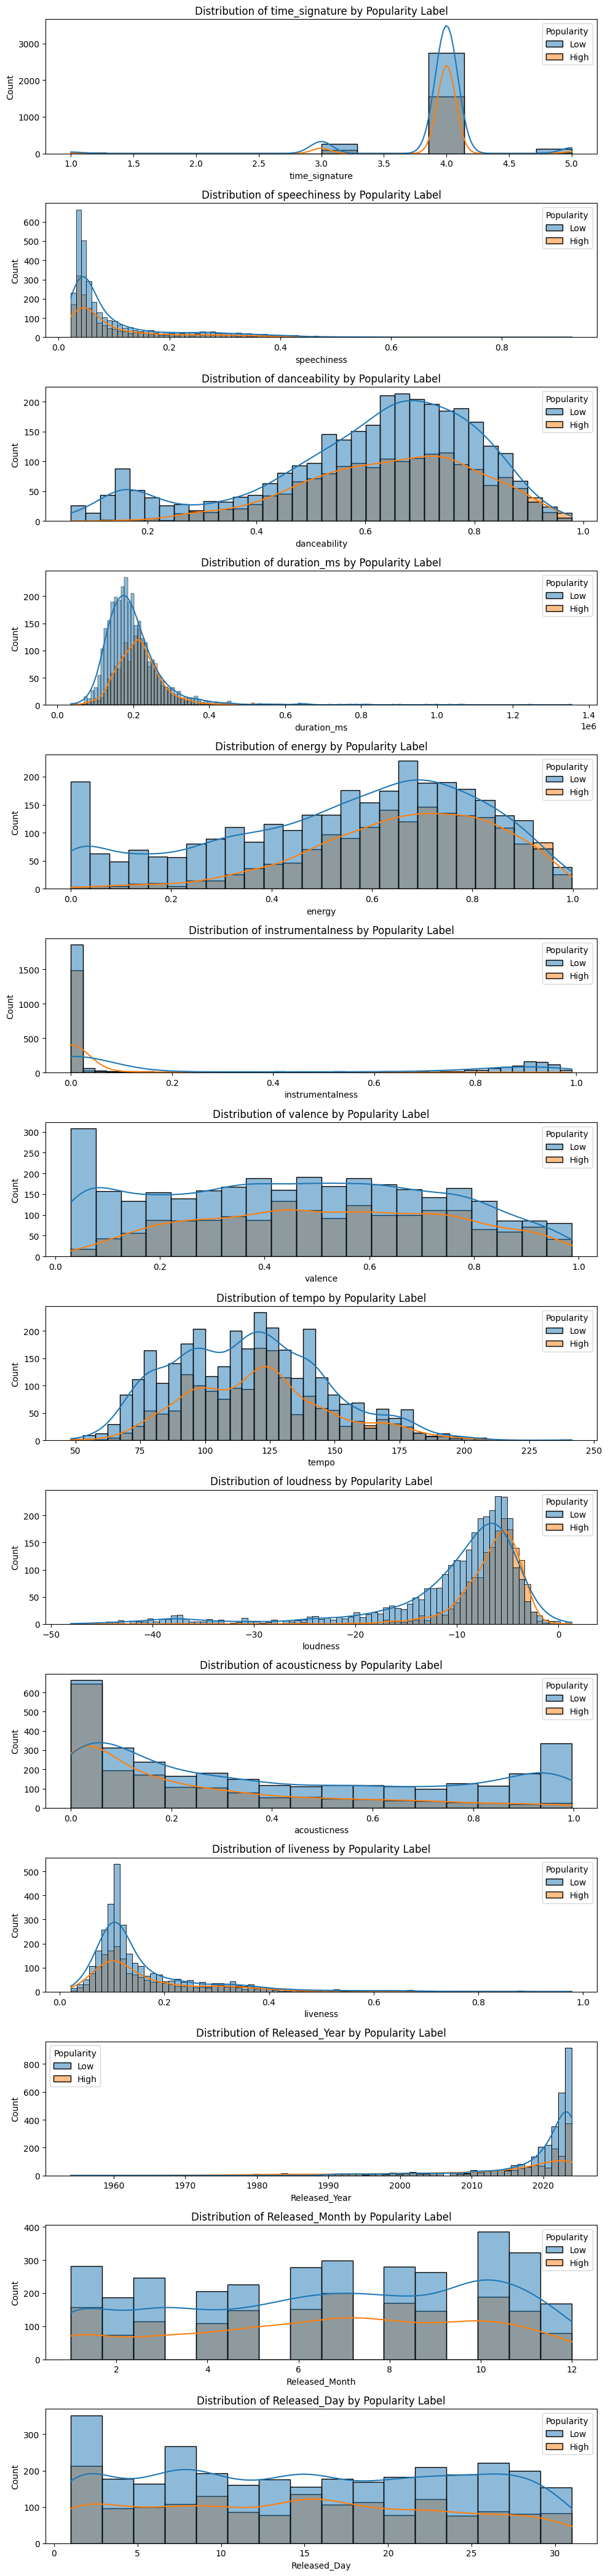

In [ ]:
#Set matplotlib figures
fig,axes = plt.subplots(len(numerical_features), 1, figsize=(10,len(numerical_features)*3)) #row sebanyak len(numerical_features) dan 1 kolom

#Plot histograms
for idx, feature in enumerate(numerical_features):
  sns.histplot(data=df_encoded, x = feature, hue='Popularity',kde =True, ax =axes[idx])
  axes[idx].set_title(f'Distribution of {feature} by Popularity Label')

plt.tight_layout()
plt.show()

####Color Differences Across Plot Versions

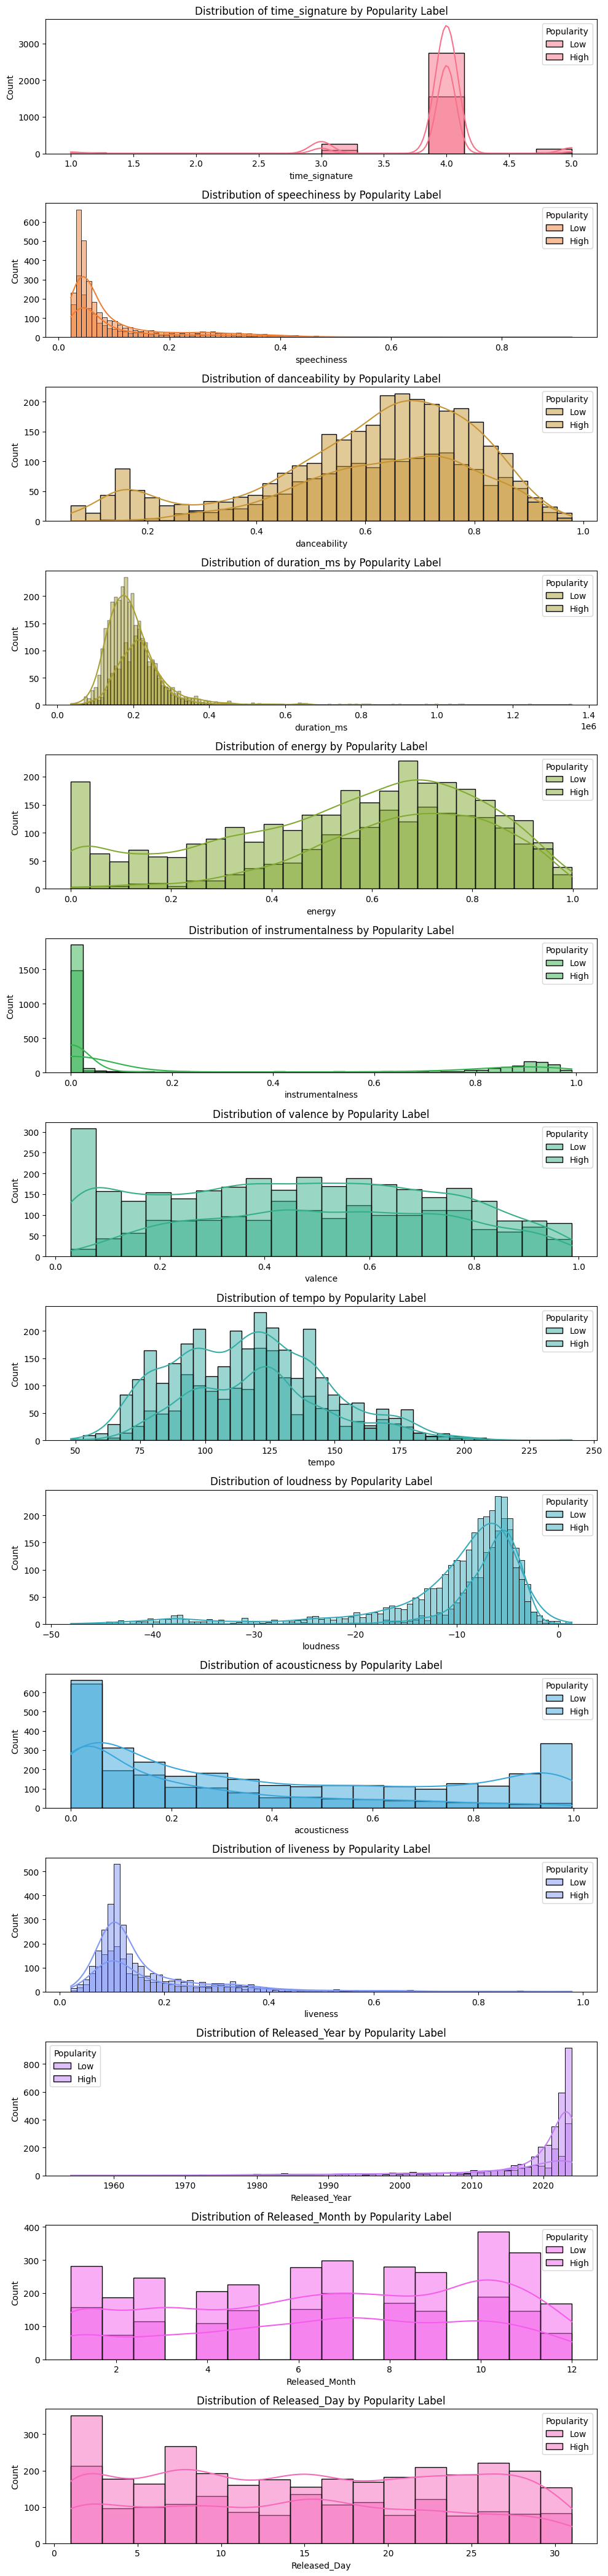

In [ ]:
#Set matplotlib figures
fig,axes = plt.subplots(len(numerical_features), 1, figsize=(10,len(numerical_features)*3))

colors =sns.color_palette("husl", len(numerical_features)) # ambil warna berbeda dari seaborn palette

#Plot histograms
for idx, feature in enumerate(numerical_features):
  sns.histplot(data=df_encoded, x = feature, hue='Popularity',kde =True, ax =axes[idx], palette={label:colors[idx] for label in df_encoded['Popularity'].unique()})
  axes[idx].set_title(f'Distribution of {feature} by Popularity Label')

plt.tight_layout()
plt.show()

###Boxplots for numerical features

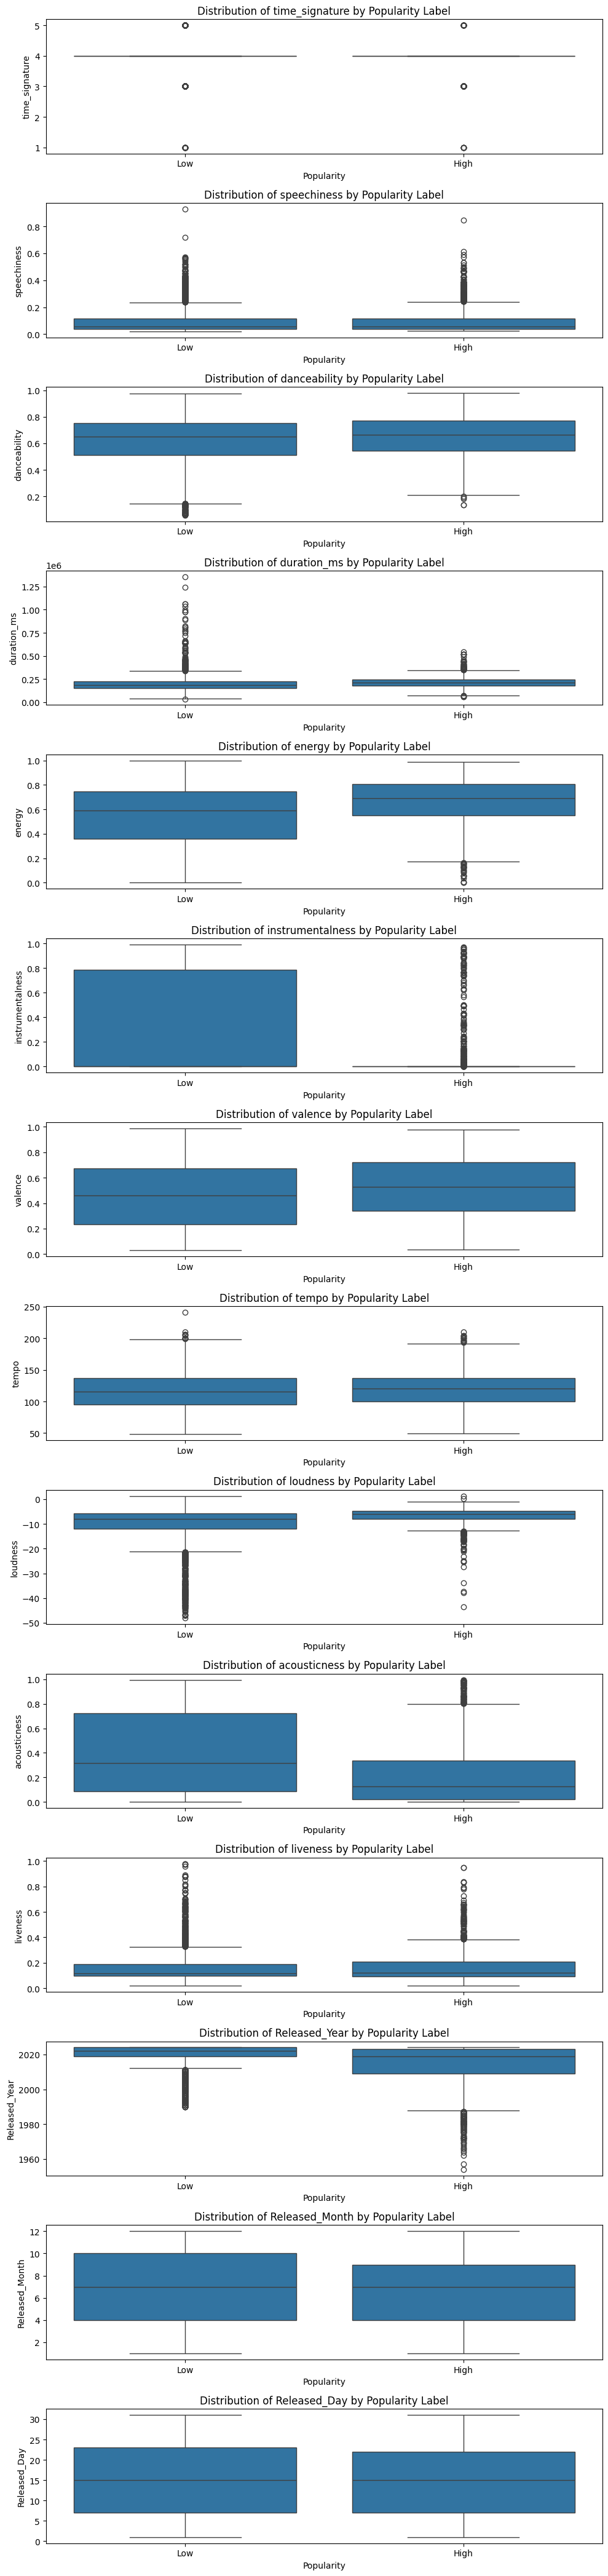

In [ ]:
#Set matplotlib figures
fig,axes = plt.subplots(len(numerical_features), 1, figsize=(10,len(numerical_features)*3))

#Plot boxplots
for idx, feature in enumerate(numerical_features):
  sns.boxplot(data=df_encoded, y= feature, x='Popularity', ax =axes[idx])
  axes[idx].set_title(f'Distribution of {feature} by Popularity Label')

plt.tight_layout()
plt.show()

####Color Differences Across Plot Versions

<ipython-input-30-a0fd1713862a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, y = feature, x='Popularity', ax =axes[idx], palette={label:colors[idx] for label in df_encoded['Popularity'].unique()})
<ipython-input-30-a0fd1713862a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, y = feature, x='Popularity', ax =axes[idx], palette={label:colors[idx] for label in df_encoded['Popularity'].unique()})
<ipython-input-30-a0fd1713862a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, y = feature, 

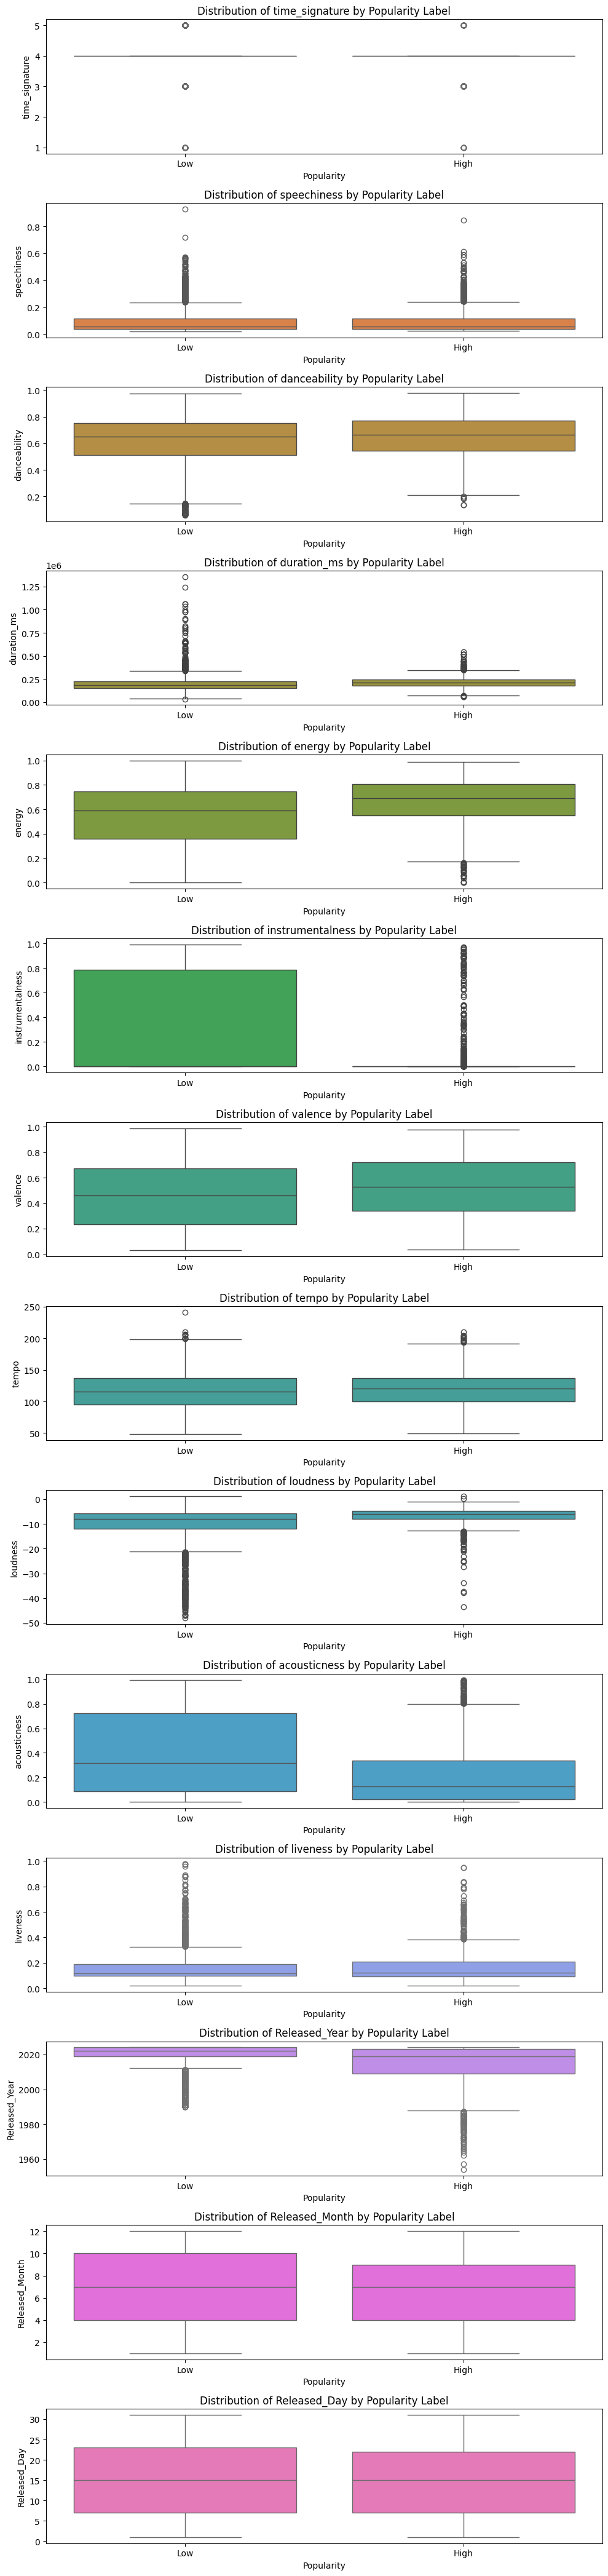

In [ ]:
#Set matplotlib figures
fig,axes = plt.subplots(len(numerical_features), 1, figsize=(10,len(numerical_features)*3))

colors =sns.color_palette("husl", len(numerical_features)) # ambil warna berbeda dari seaborn palette

#Plot boxplot
for idx, feature in enumerate(numerical_features):
  sns.boxplot(data=df_encoded, y = feature, x='Popularity', ax =axes[idx], palette={label:colors[idx] for label in df_encoded['Popularity'].unique()})
  axes[idx].set_title(f'Distribution of {feature} by Popularity Label')

plt.tight_layout()
plt.show()

### Correlation Matrix

In [ ]:
numerical_features=numerical_features.tolist()

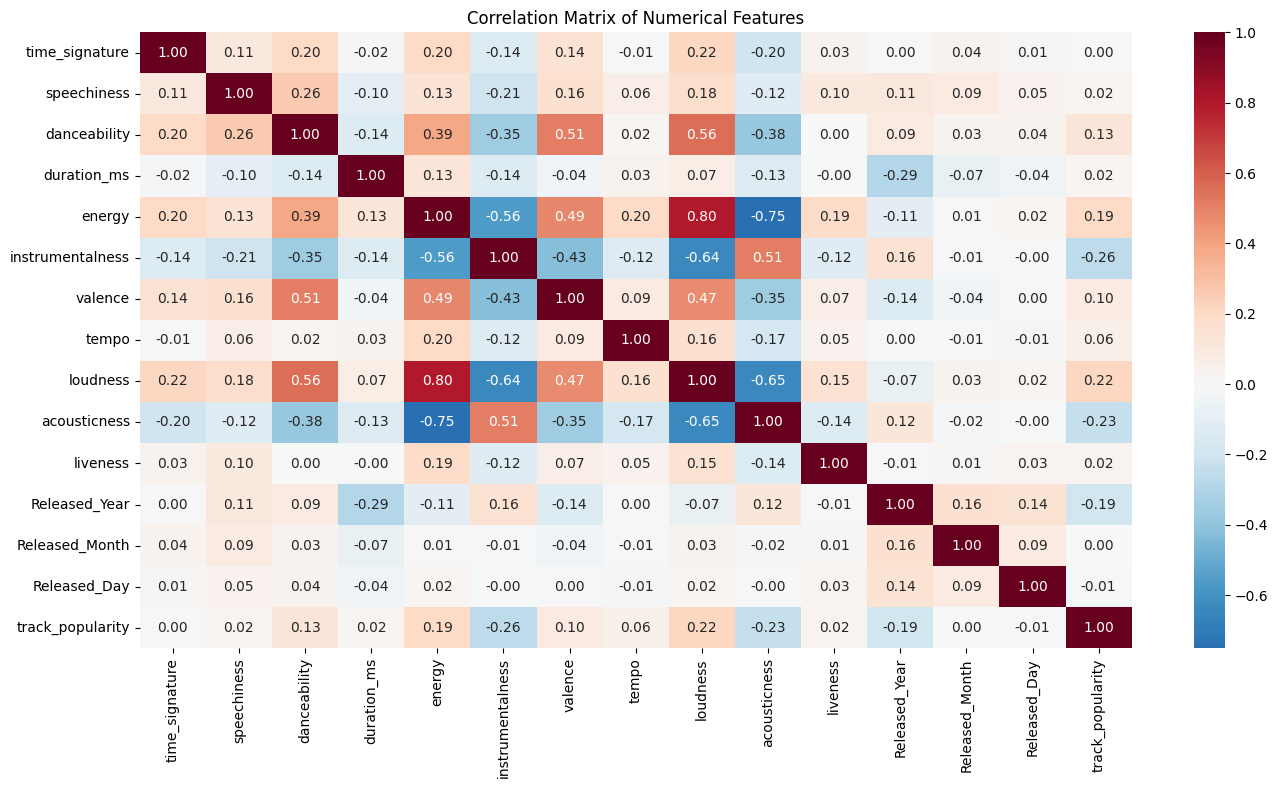

In [ ]:
plt.figure(figsize=(16,8))

sns.heatmap(df_encoded[numerical_features +['track_popularity']].corr(),annot=True, fmt= '.2f',cmap='RdBu_r',center =0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##Analysis of Categorical Features


###Countplots for categorical features

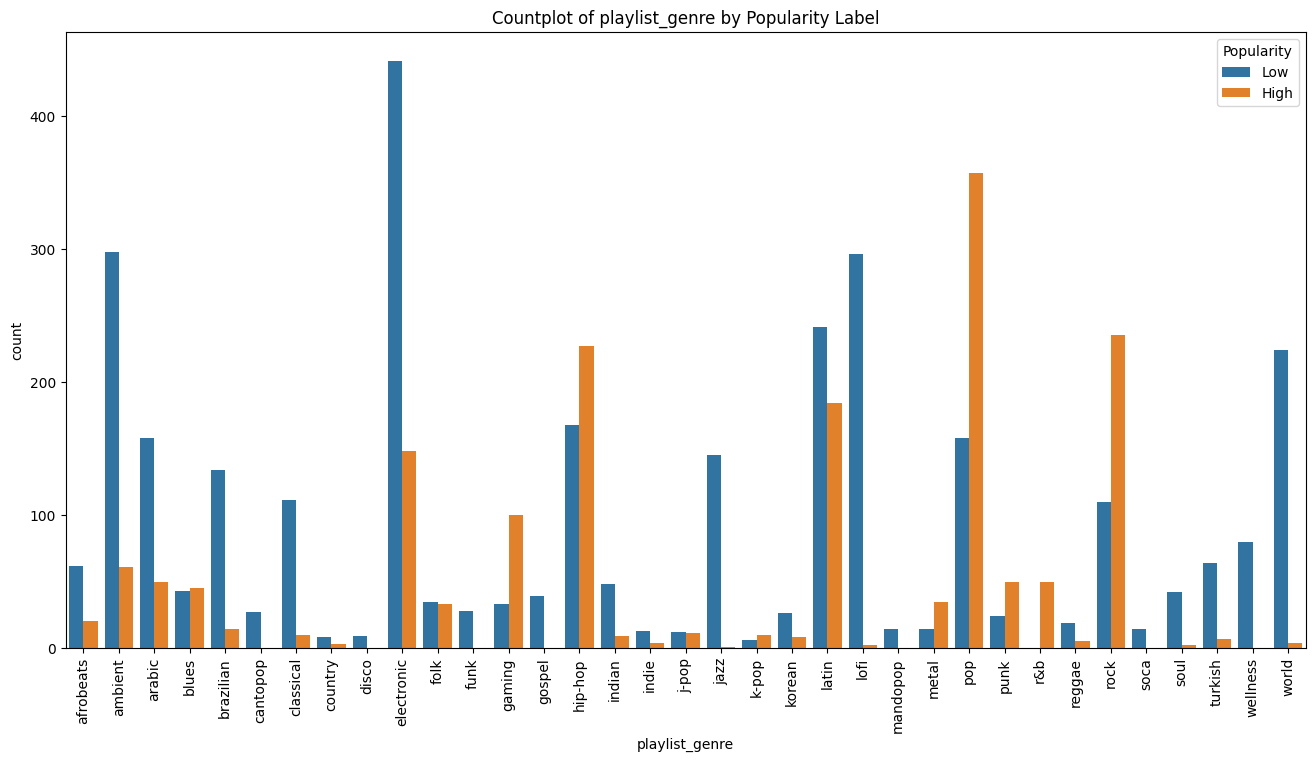

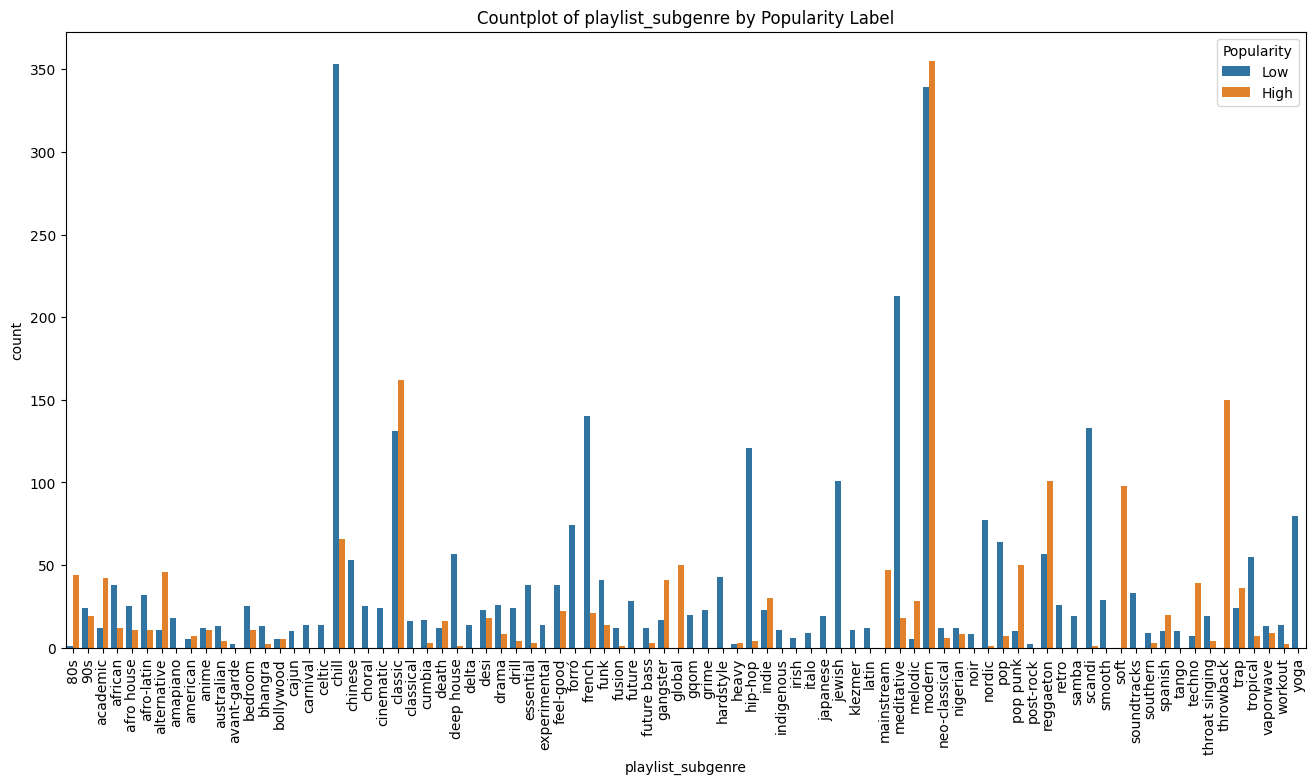

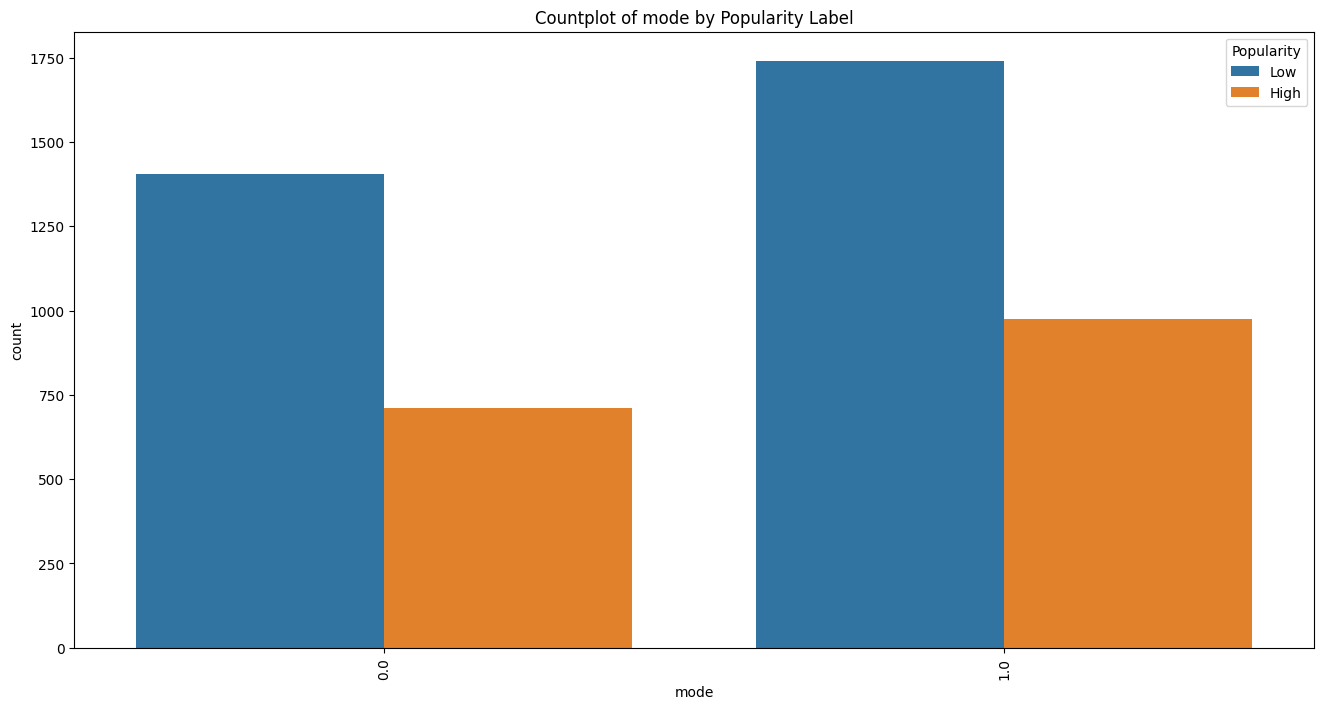

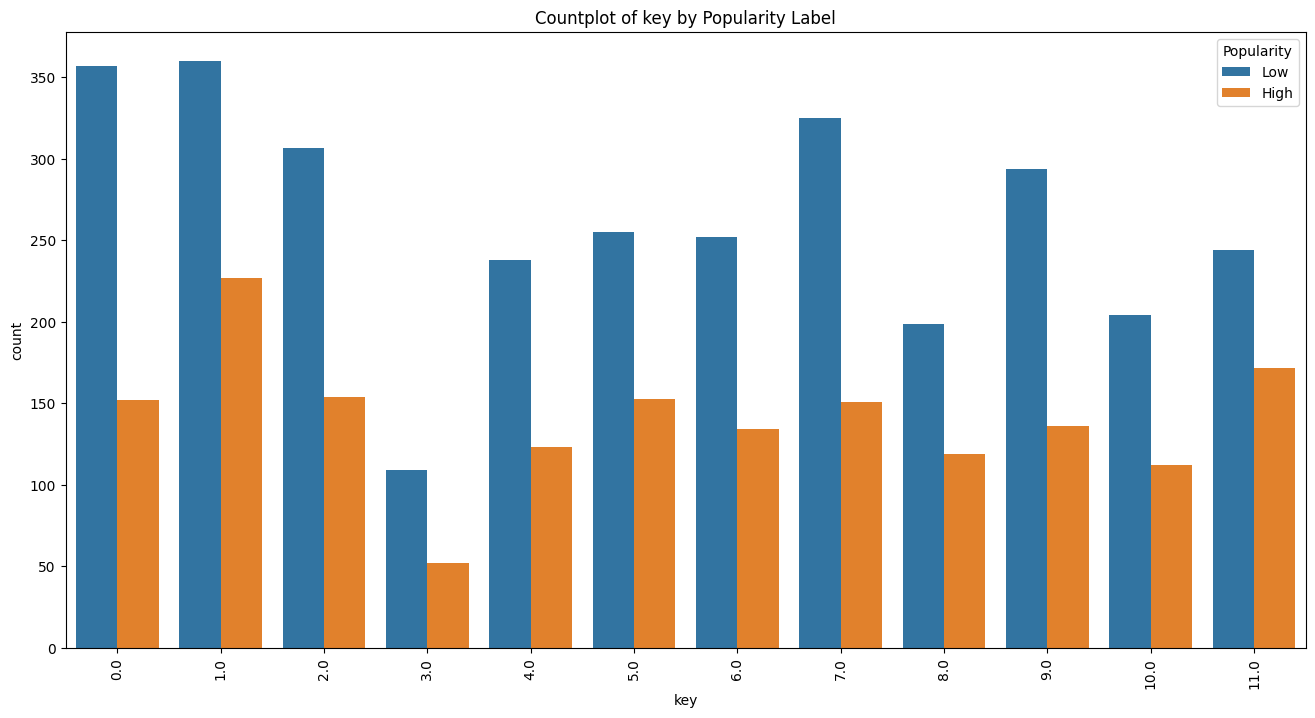

In [ ]:
for feature in categorical_features:
  plt.figure(figsize=(16,8))
  sns.countplot(data=df,x=feature, hue='Popularity')
  plt.title(f'Countplot of {feature} by Popularity Label')
  plt.xticks(rotation=90)

  plt.show()

###Color Differences Across Plot Versions

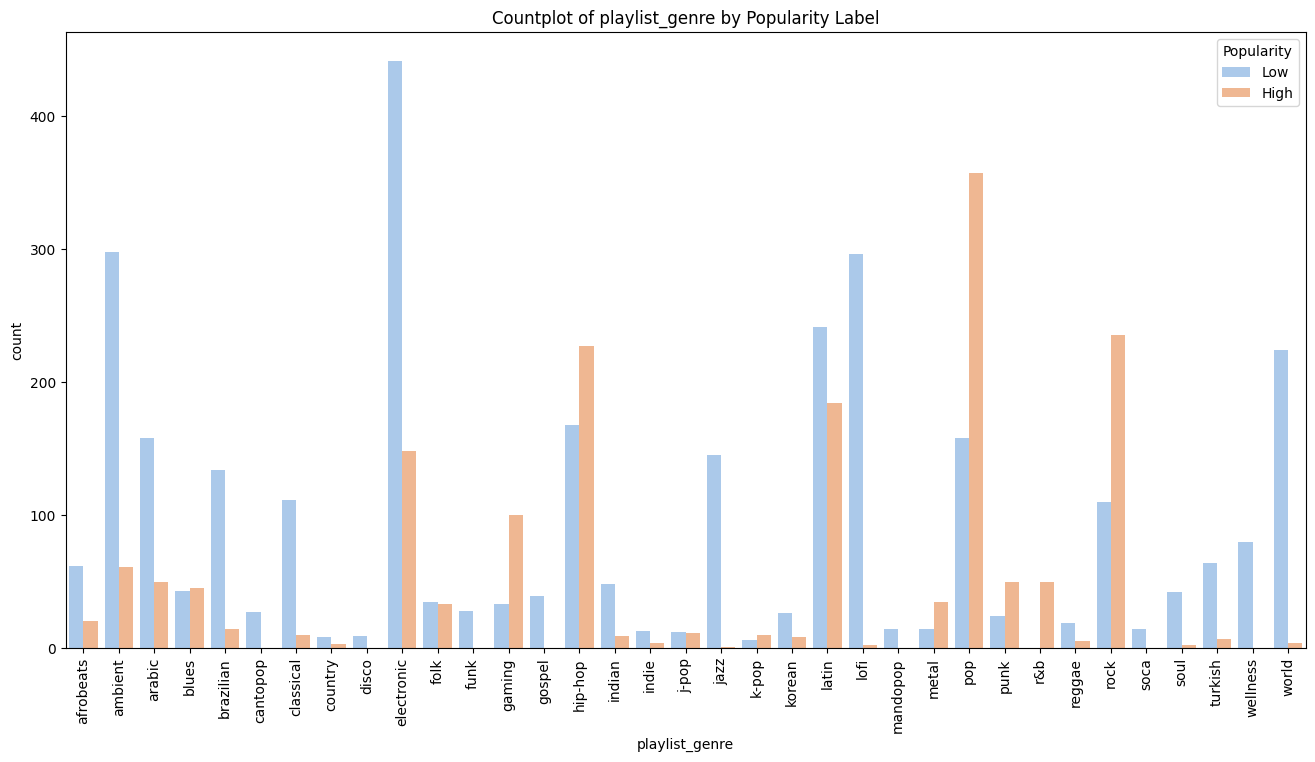

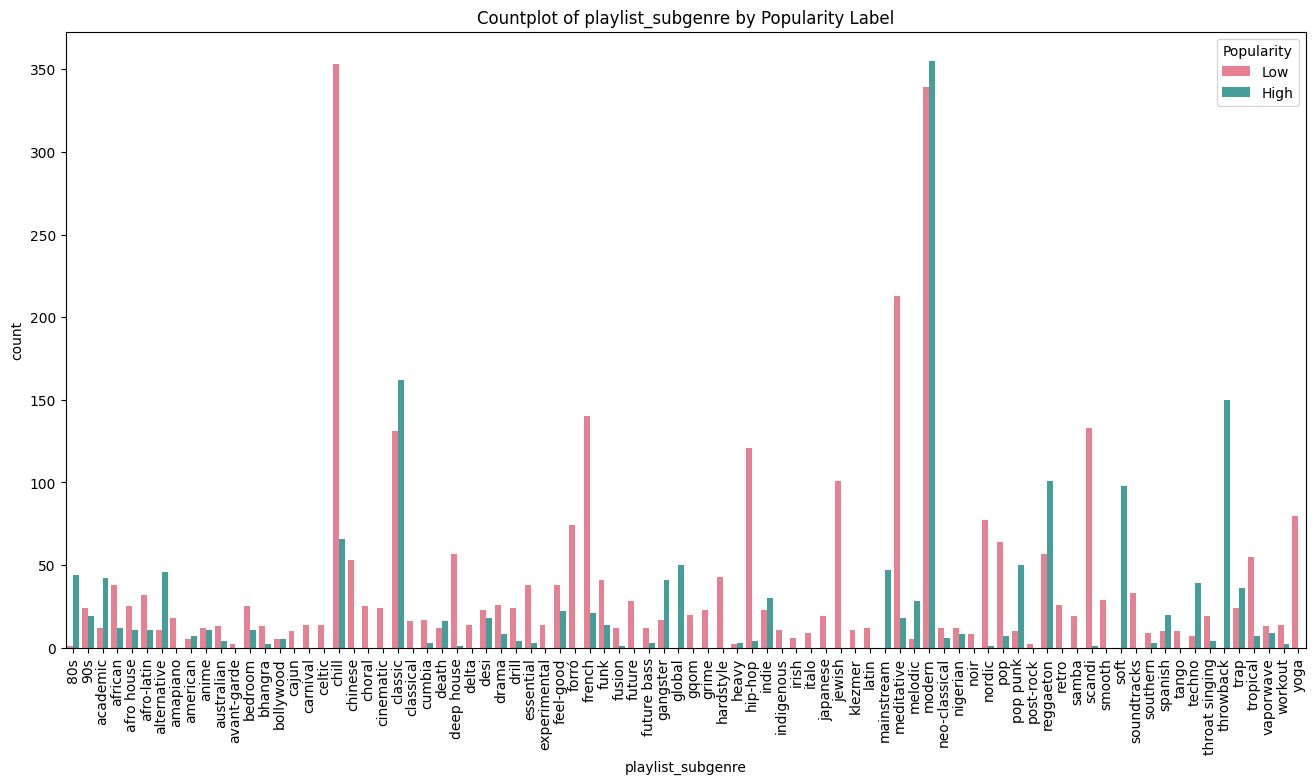

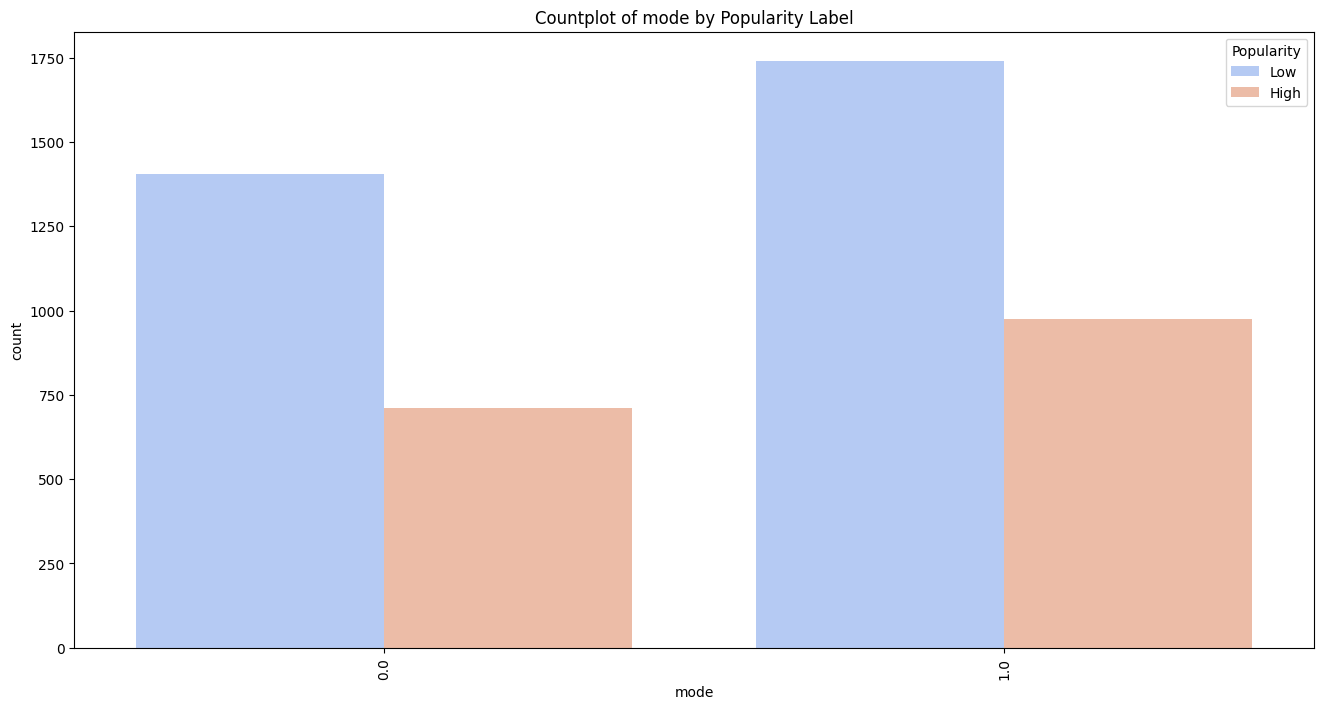

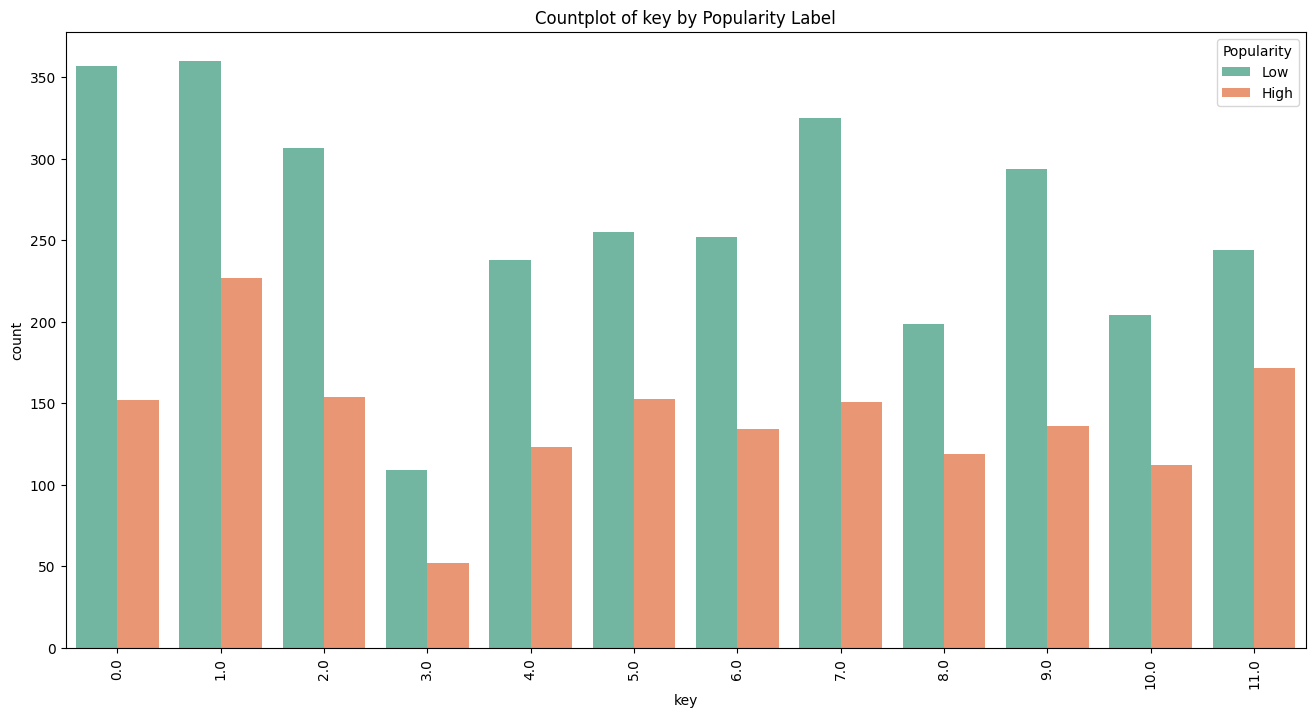

In [ ]:
palettes = ['pastel', 'husl', 'coolwarm', 'Set2', 'Dark2']

for idx,feature in enumerate(categorical_features):
  plt.figure(figsize=(16,8))
  palette= palettes[idx%len(palettes)] # Supaya tidak error kalau fitur lebih banyak dari palet
  sns.countplot(data=df,x=feature, hue='Popularity',palette=palette)
  plt.title(f'Countplot of {feature} by Popularity Label')
  plt.xticks(rotation=90)

  plt.show()

##Feature Relationship with Popularity

###Scatter Plots for audio features with track_popularity

In [ ]:
features_to_plot=['danceability','tempo','valence','energy','loudness','speechiness','liveness','instrumentalness','acousticness']

for feature in features_to_plot:
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=df_encoded,x=feature,y='track_popularity',hue='Popularity')
  plt.title(f'{feature.capitalize()} vs Track Popularity')
  plt.tight_layout()
  plt.show()

###Scatter plots for all numerical features

In [ ]:
for feature in numerical_features:
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=df_encoded,x=feature,y='track_popularity',hue='Popularity')
  plt.title(f'{feature.capitalize()} vs Track Popularity')
  plt.tight_layout()
  plt.show()

In [ ]:
# for feature in numerical_features:
#   plt.figure(figsize=(10,6))
#   sns.violinplot(data=df_encoded,hue=feature,x='Popularity')
#   plt.title(f'{feature.capitalize()} vs Track Popularity')
#   plt.tight_layout()
#   plt.show()

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


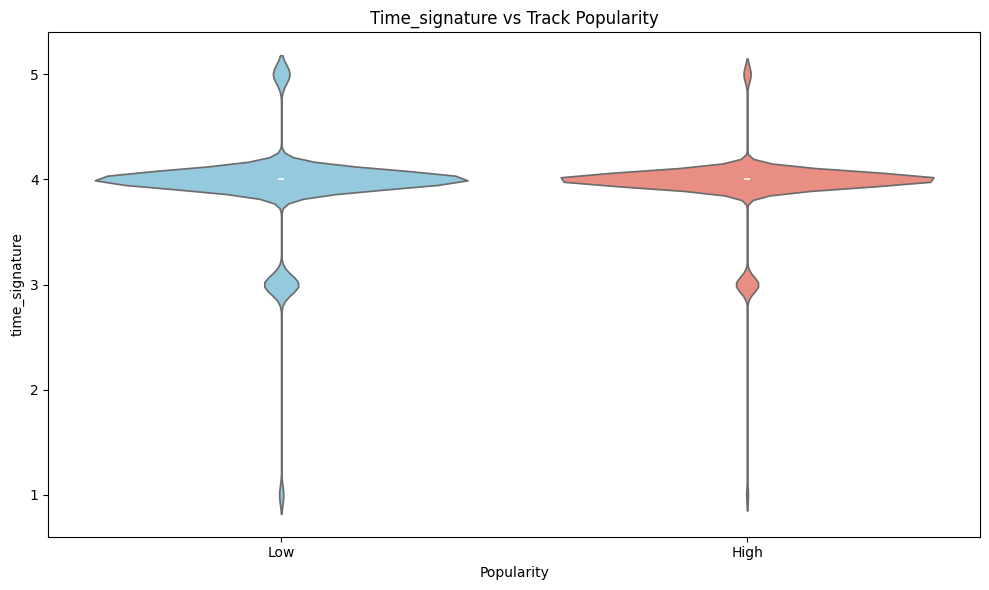

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


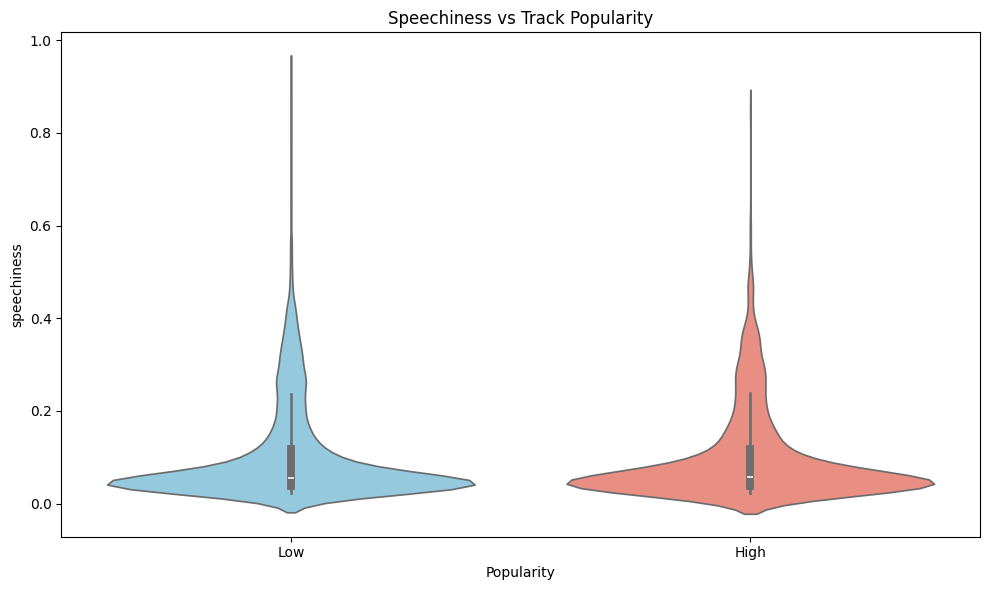

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


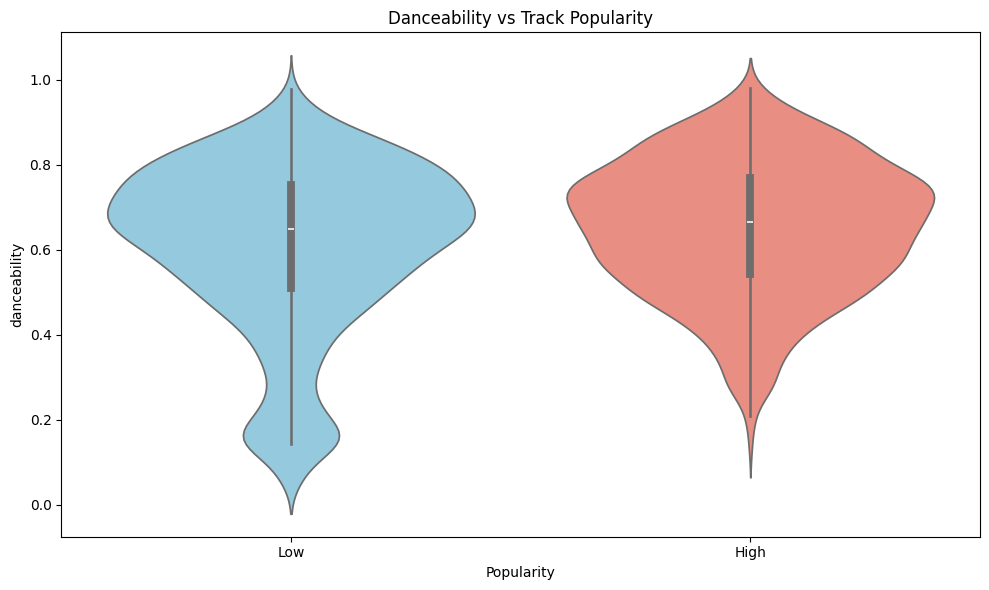

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


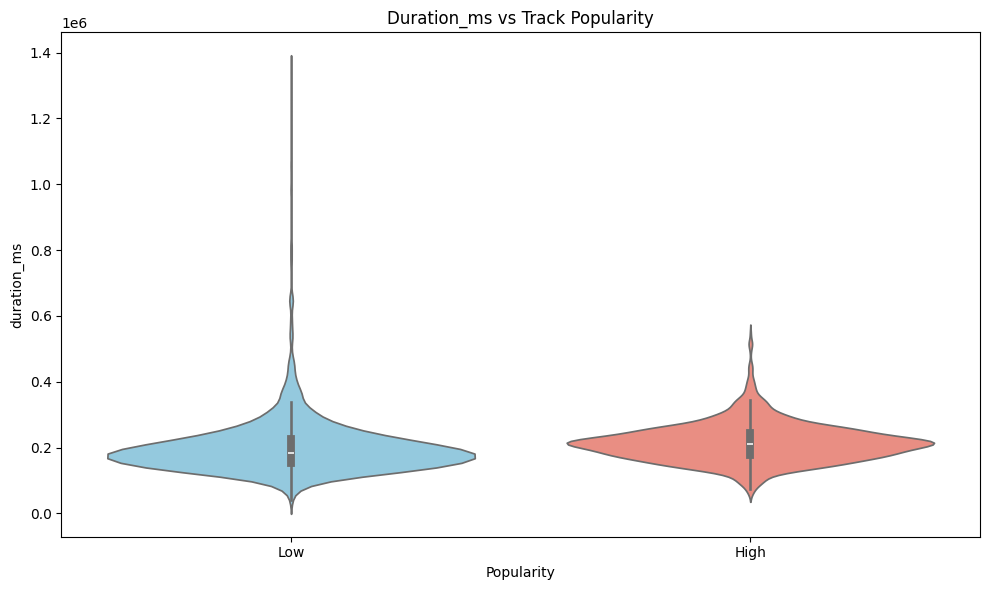

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


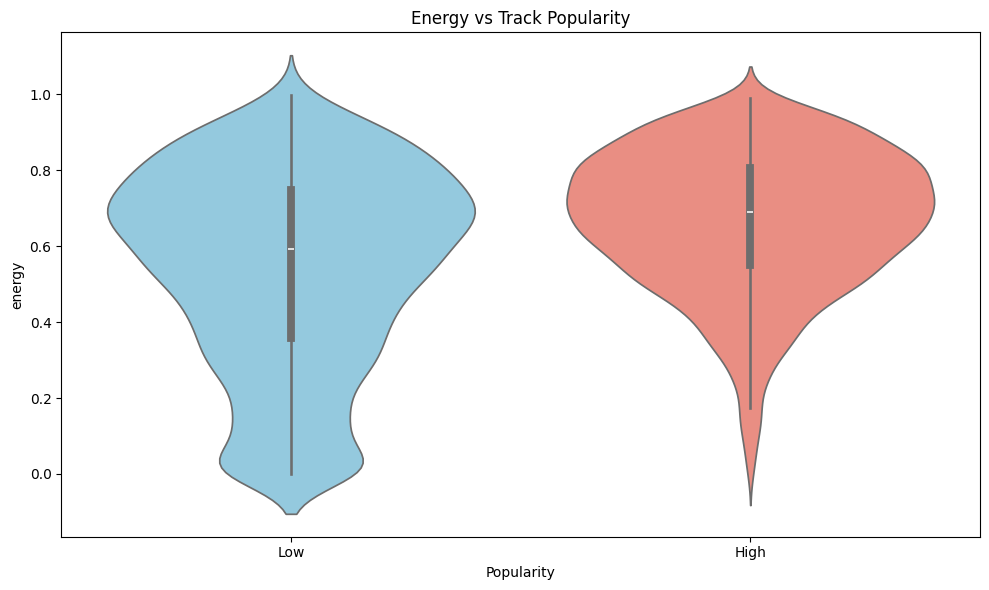

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


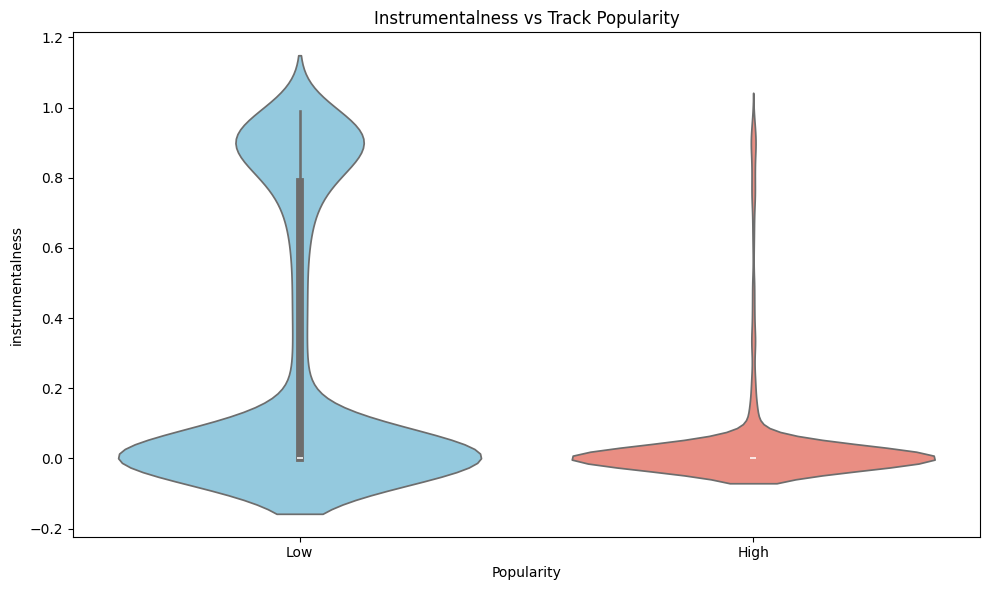

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


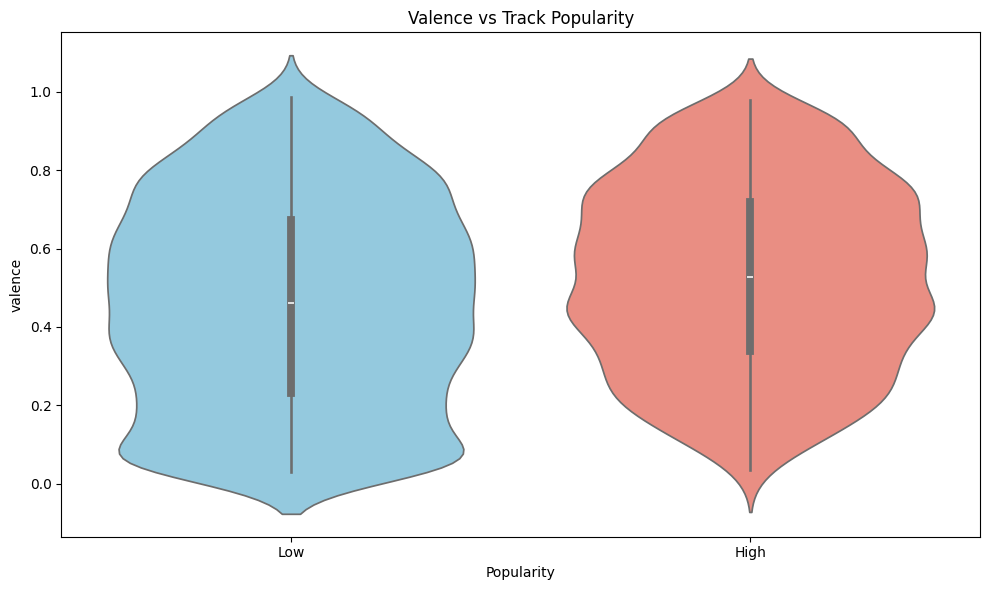

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


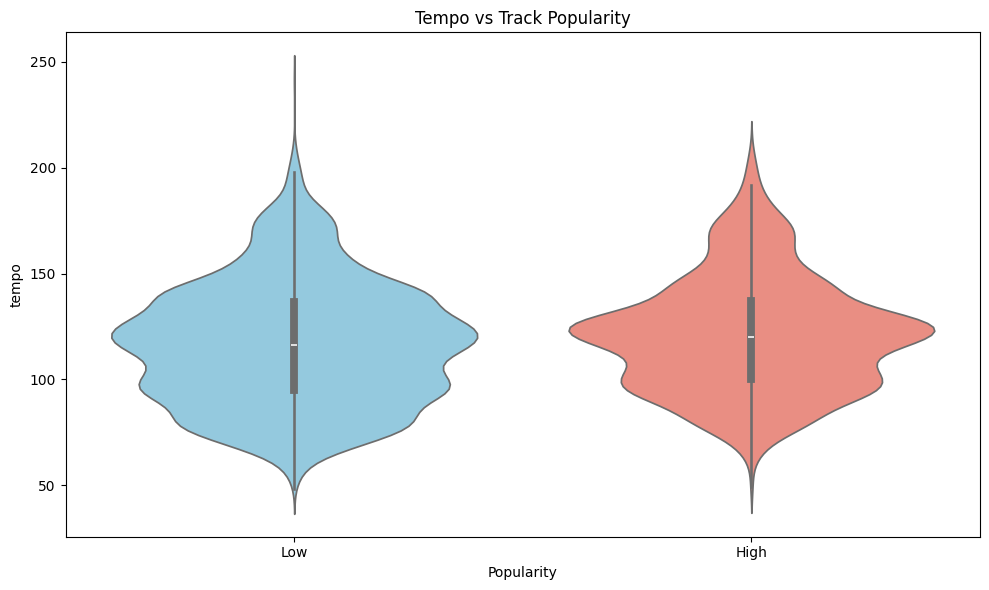

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


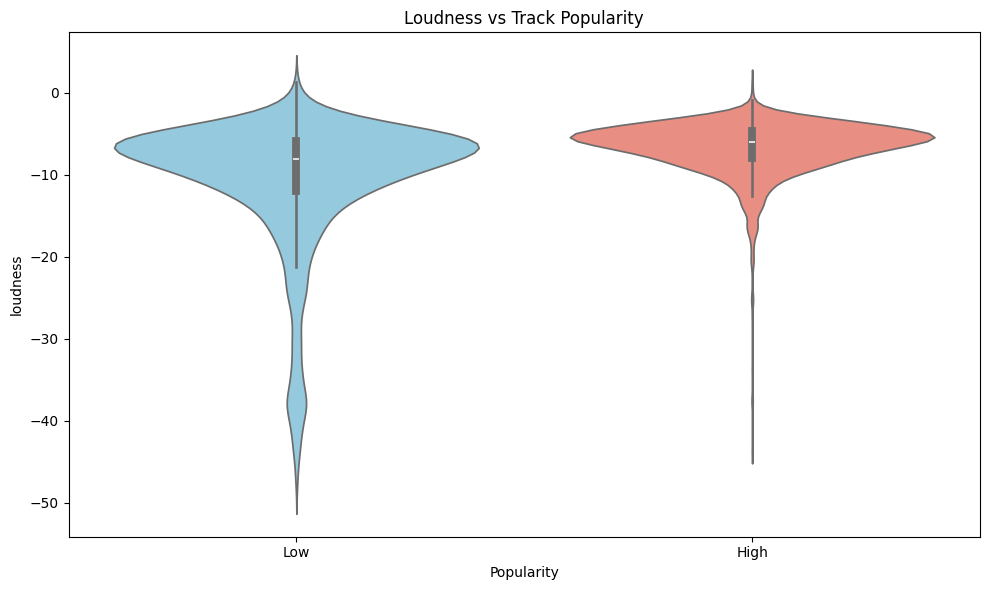

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


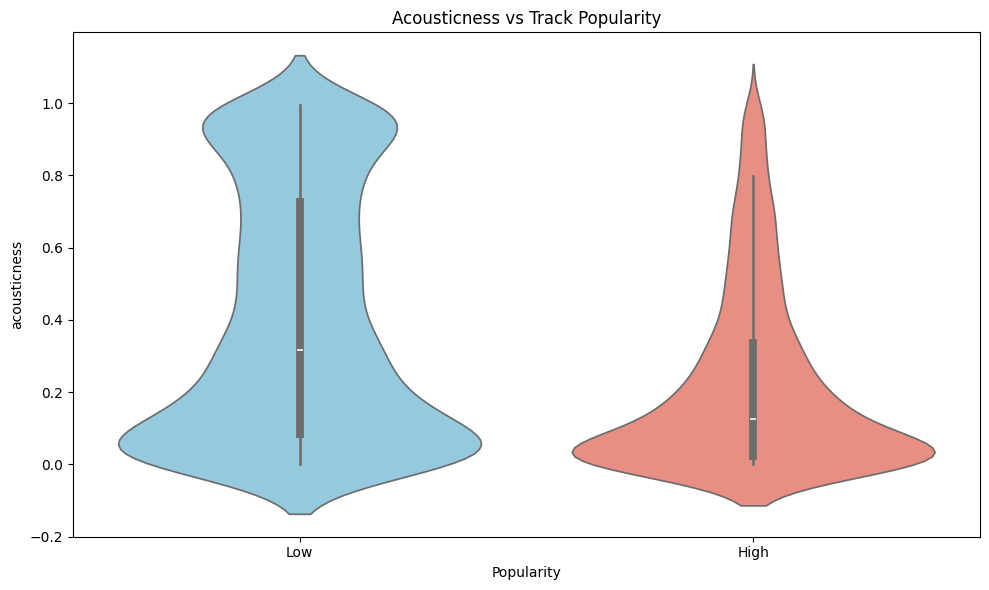

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


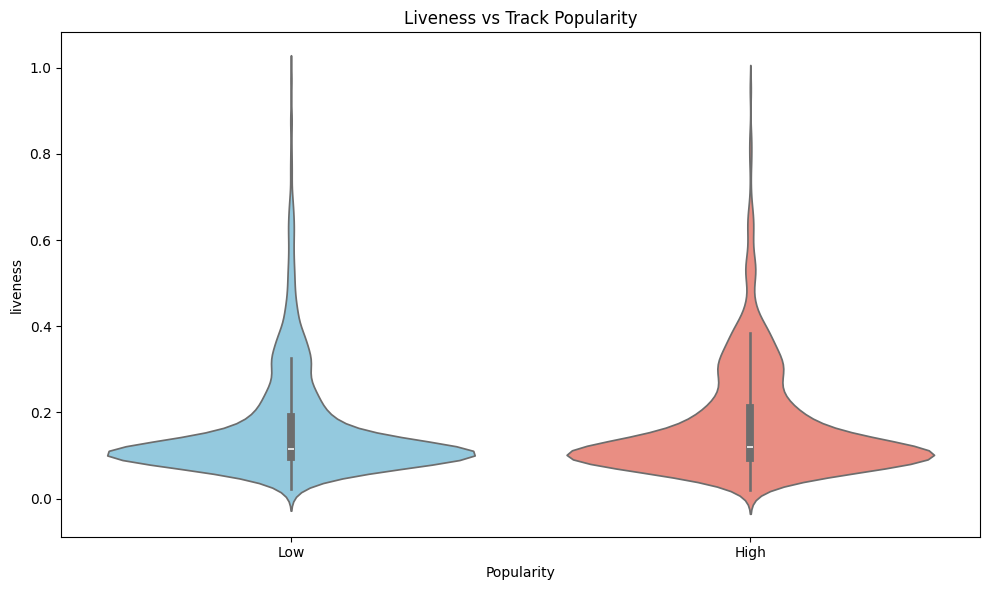

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


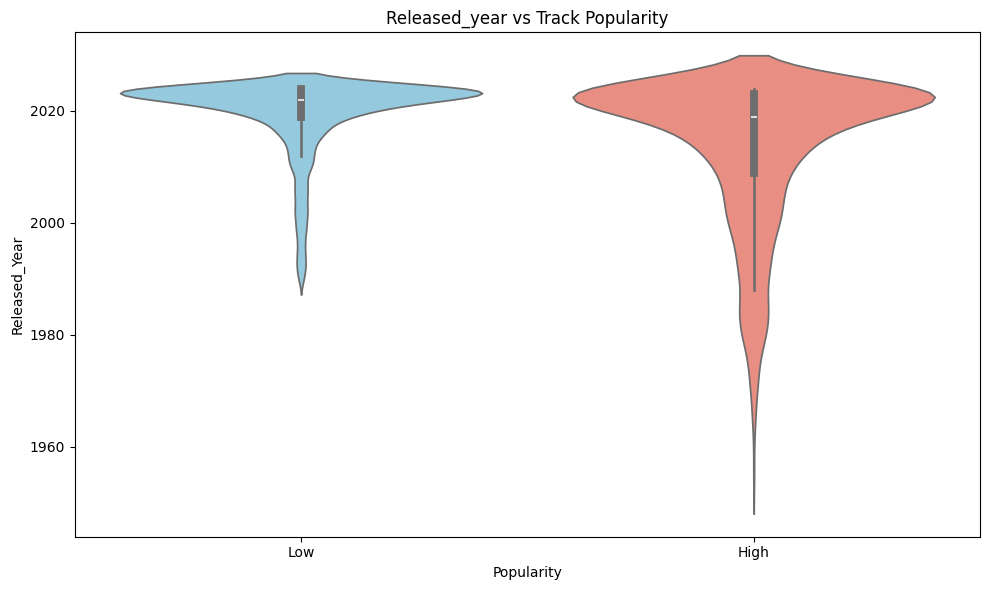

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


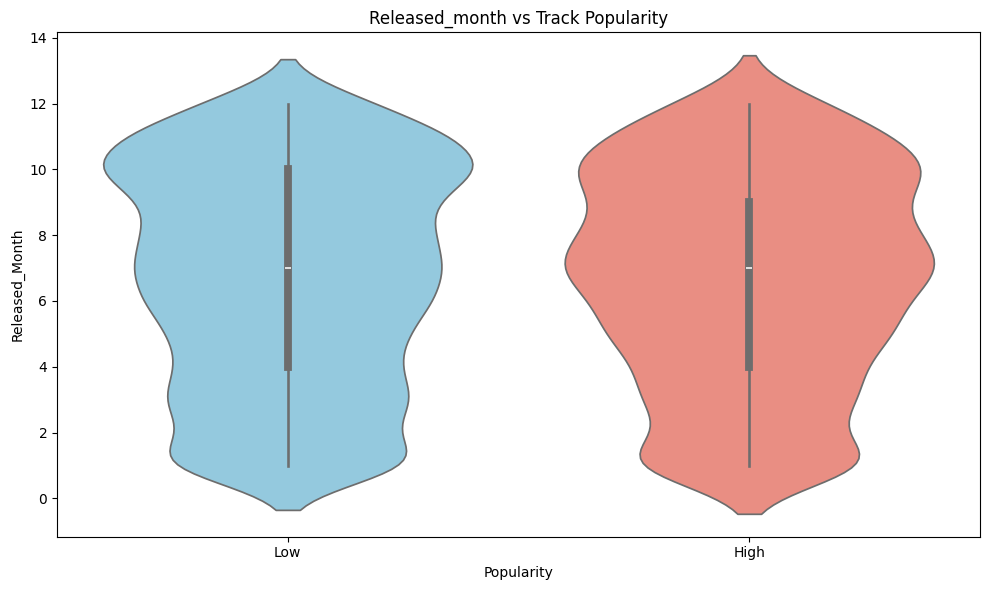

<ipython-input-38-882e7d222030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})


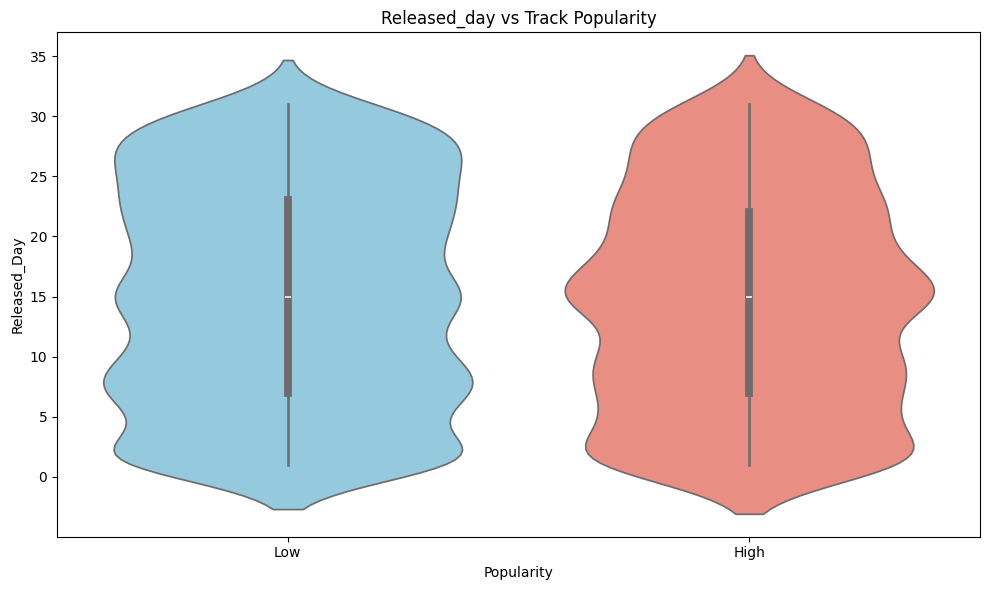

In [ ]:
for feature in numerical_features:
  plt.figure(figsize=(10,6))
  sns.violinplot(data=df_encoded,y=feature,x='Popularity', palette={'Low':'skyblue', 'High':'salmon'})
  plt.title(f'{feature.capitalize()} vs Track Popularity')
  plt.tight_layout()
  plt.show()

###Pair plot


In [ ]:
sns.pairplot(df_encoded[features_to_plot + ['track_popularity']+ ['Popularity']],hue= 'Popularity')

##Statistic Tests

###T-Tests Between Low and High-Popularity Songs¶
We'll perform t-tests to determine if the difference in means of features between low and high-popularity songs is statistically significant

In [ ]:
from scipy.stats import ttest_ind

#Seperate dataframe for low popularity and high popularity
df_low_popularity= df_encoded[df_encoded['Popularity']=='Low']
df_high_popularity = df_encoded[df_encoded['Popularity']=='High']


In [ ]:
#perform t-tests for numerical_features
significant_features=[]
alpha=0.05 #Significance level

for feature in numerical_features:
  stat,p =ttest_ind(df_low_popularity[feature],df_high_popularity[feature], nan_policy='omit')
  print(f'{feature}:p-value = {p:.4f}')
  if p < alpha:
    significant_features.append(feature)
    print(f'-> Significant different in means(p < {alpha})\n')
  else:
    print(f'-> No Significant different in means(p >= {alpha})\n')

time_signature:p-value = 0.0933
-> No Significant different in means(p >= 0.05)

speechiness:p-value = 0.6884
-> No Significant different in means(p >= 0.05)

danceability:p-value = 0.0000
-> Significant different in means(p < 0.05)

duration_ms:p-value = 0.0000
-> Significant different in means(p < 0.05)

energy:p-value = 0.0000
-> Significant different in means(p < 0.05)

instrumentalness:p-value = 0.0000
-> Significant different in means(p < 0.05)

valence:p-value = 0.0000
-> Significant different in means(p < 0.05)

tempo:p-value = 0.0000
-> Significant different in means(p < 0.05)

loudness:p-value = 0.0000
-> Significant different in means(p < 0.05)

acousticness:p-value = 0.0000
-> Significant different in means(p < 0.05)

liveness:p-value = 0.1056
-> No Significant different in means(p >= 0.05)

Released_Year:p-value = 0.0000
-> Significant different in means(p < 0.05)

Released_Month:p-value = 0.7065
-> No Significant different in means(p >= 0.05)

Released_Day:p-value = 0.011

##Correlation with Target Variable

###Calculating Correlation with Track Popularity

In [ ]:
# Calculate Pearson correlation coefficients between numerical features and track popularity
feature_correlations= df_encoded[numerical_features + ['track_popularity']].corr()['track_popularity'].sort_values (ascending=False)

#Display the correlations
print('Correlation with Track Popularity:')
print(feature_correlations)

Correlation with Track Popularity:
track_popularity    1.000000
loudness            0.216958
energy              0.194502
danceability        0.128340
valence             0.096567
tempo               0.059954
liveness            0.022226
duration_ms         0.021566
speechiness         0.019330
time_signature      0.003213
Released_Month      0.000731
Released_Day       -0.006624
Released_Year      -0.194514
acousticness       -0.232543
instrumentalness   -0.263070
Name: track_popularity, dtype: float64


###Visualizing Feature Correlations


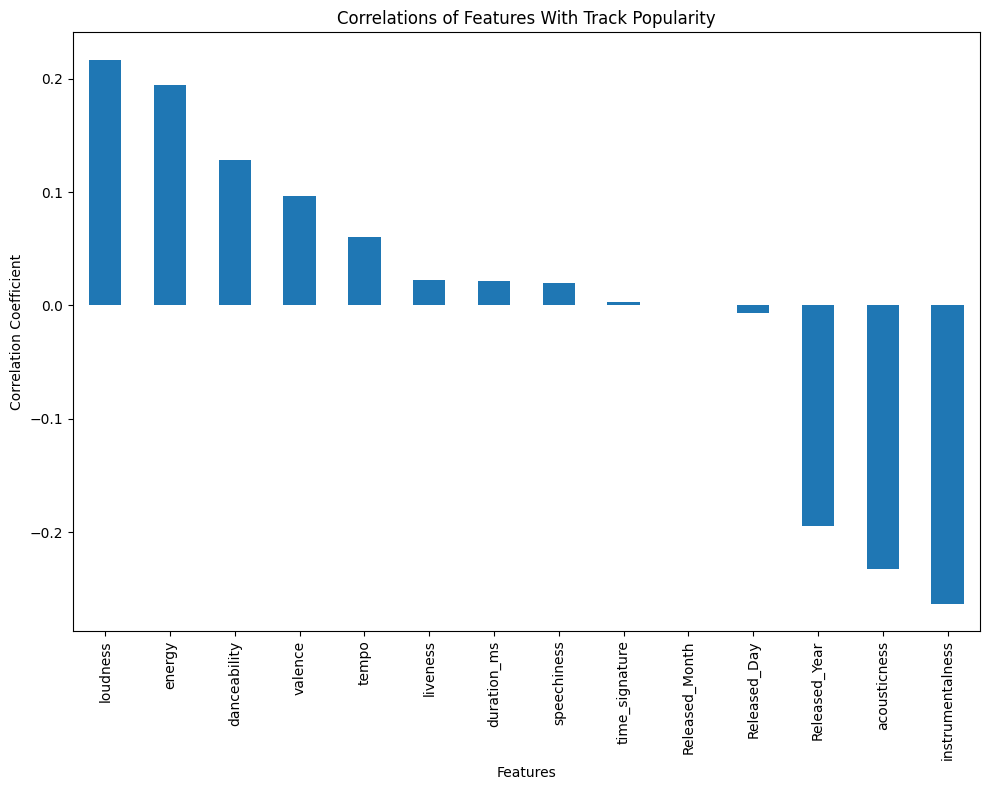

In [ ]:
plt.figure(figsize=(10,8))
feature_correlations.drop('track_popularity').plot(kind='bar')
plt.title('Correlations of Features With Track Popularity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

##Analysis of Release Features

###Popularity Over Release Years

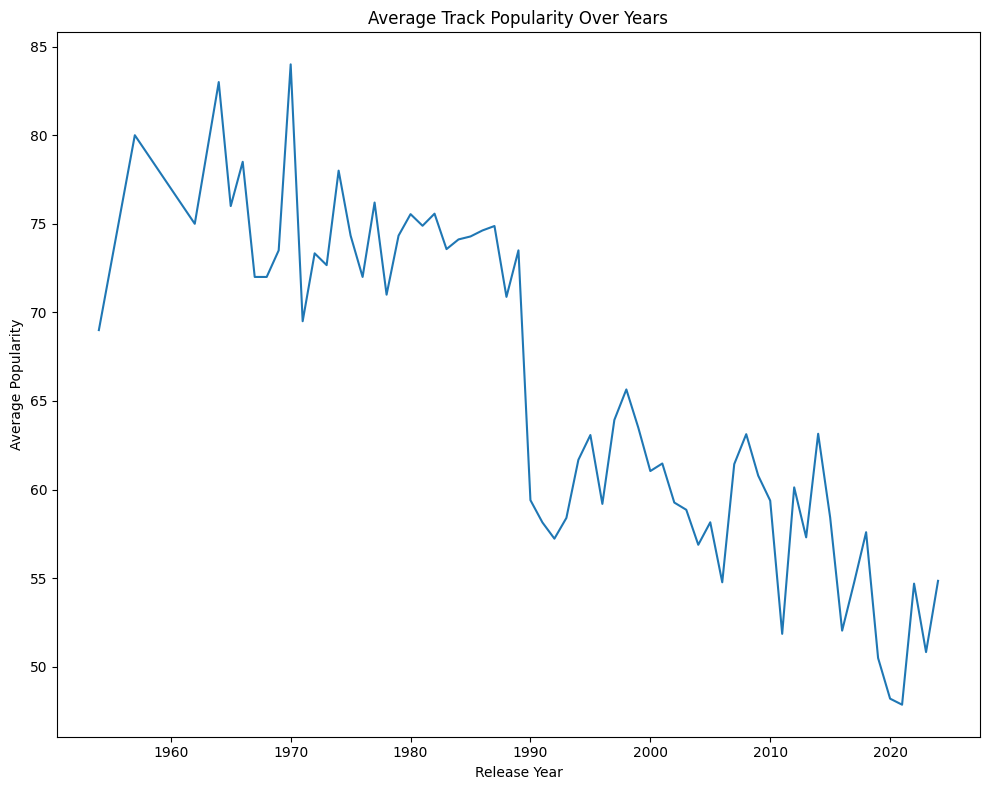

In [ ]:
#Average Popularity by release year
popularity_by_year= df_encoded.groupby('Released_Year')['track_popularity'].mean()

plt.figure(figsize=(10,8))
popularity_by_year.plot()
plt.title('Average Track Popularity Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

###Number of Tracks Released over Years

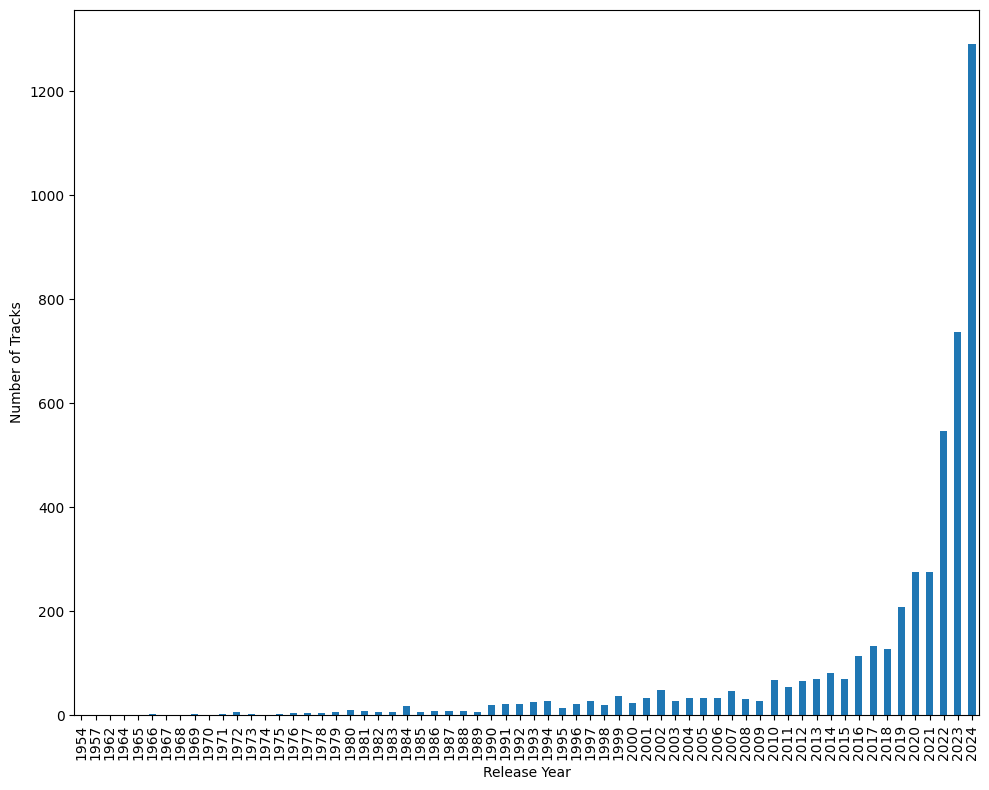

In [ ]:
#Count of tracks by release year
df_encoded['Released_Year']=df_encoded['Released_Year'].astype(int)
tracks_per_year= df_encoded.groupby('Released_Year').size()

plt.figure(figsize=(10,8))
tracks_per_year.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()

##Categorical Feature Analysis

###Popularity by playlist genre

<ipython-input-46-36a6e27c25ac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_popularity_genre=df.groupby('playlist_genre')['track_popularity'].mean().sort_values()


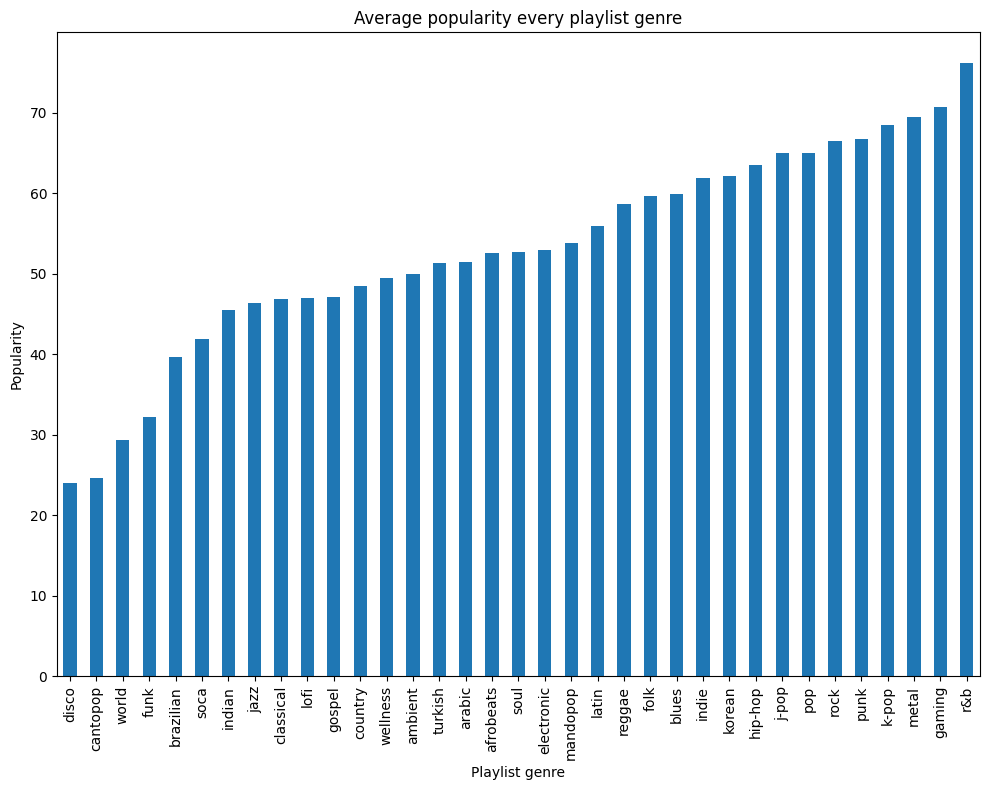

In [ ]:
#Average Popularity by playlist genre
df_popularity_genre=df.groupby('playlist_genre')['track_popularity'].mean().sort_values()

plt.figure(figsize=(10,8))
df_popularity_genre.plot(kind='bar')
plt.title('Average popularity every playlist genre')
plt.xlabel('Playlist genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###Popularity by subplaylist genre

<ipython-input-47-e70adc496002>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_popularity_subgenre=df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values()


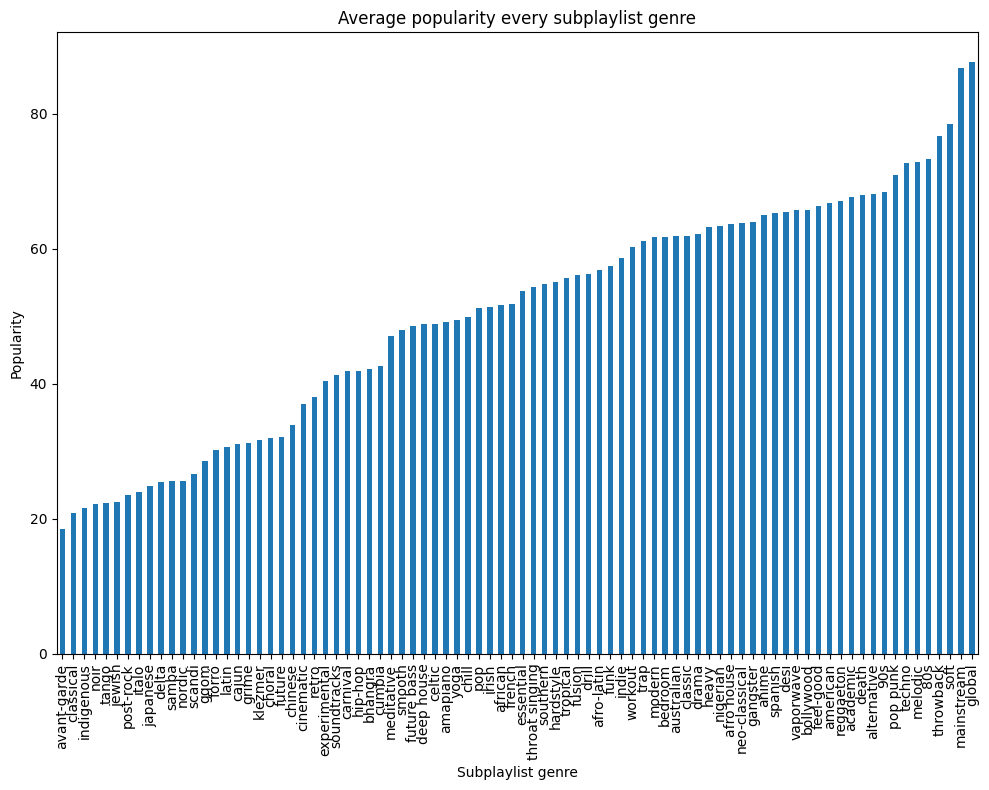

In [ ]:
#Average Popularity by subplaylist genre
df_popularity_subgenre=df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values()

plt.figure(figsize=(10,8))
df_popularity_subgenre.plot(kind='bar')
plt.title('Average popularity every subplaylist genre')
plt.xlabel('Subplaylist genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###Popularity by subplaylist genre (Top 20)

<ipython-input-93-d2d1d4ef07d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_popularity_subgenre=df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values()


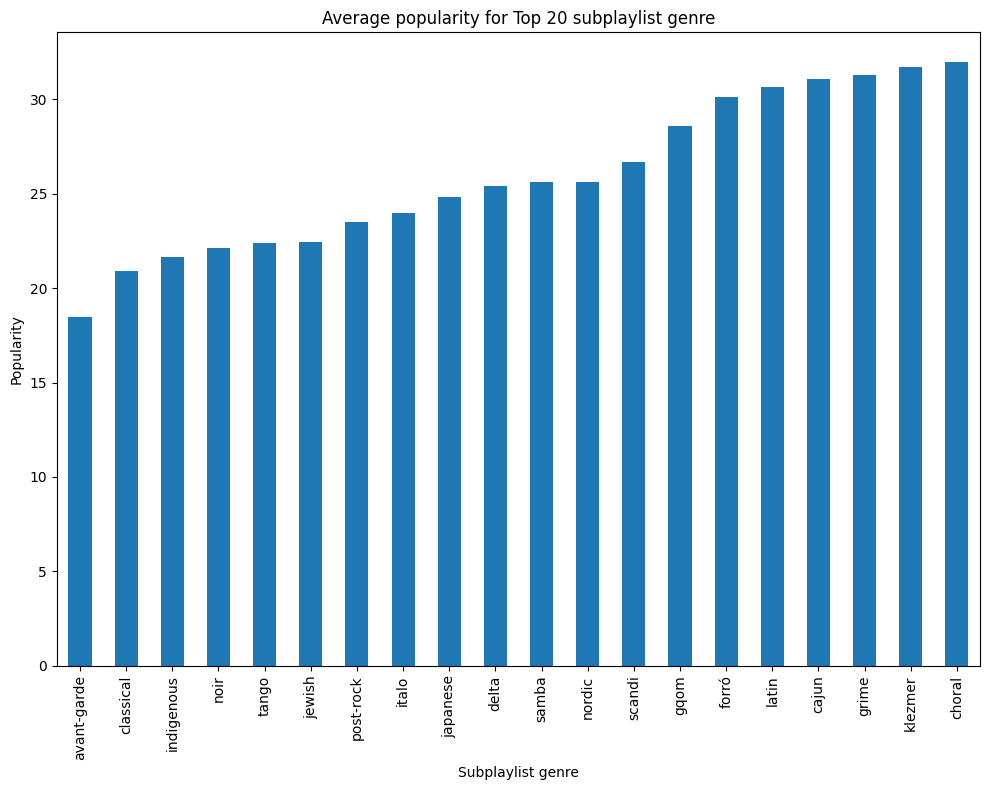

In [ ]:
#Average Popularity by subplaylist genre
df_popularity_subgenre=df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values()

plt.figure(figsize=(10,8))
df_popularity_subgenre.head(20).plot(kind='bar')
plt.title('Average popularity for Top 20 subplaylist genre')
plt.xlabel('Subplaylist genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###Mode and Key Distribution


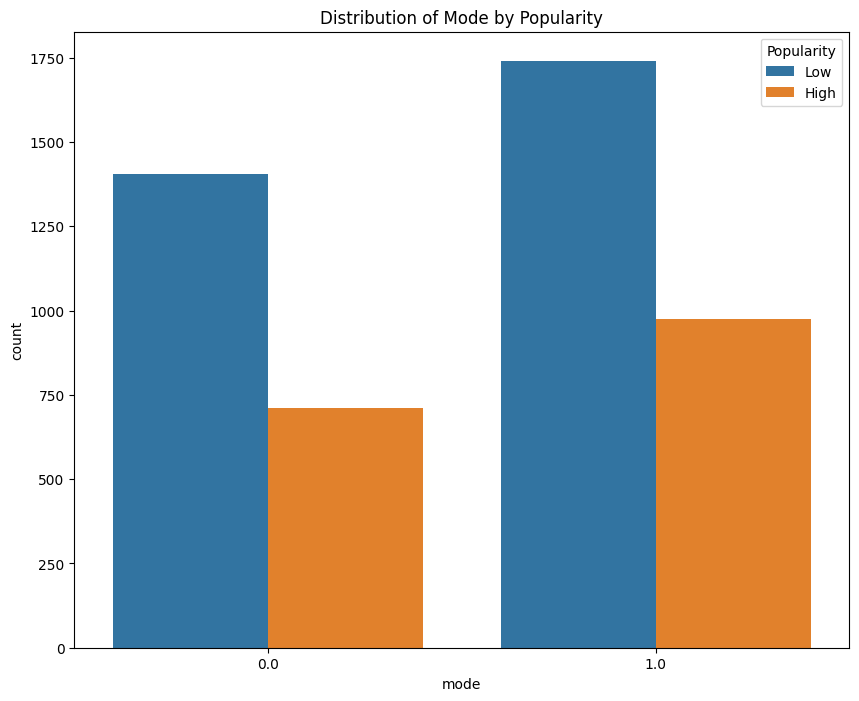

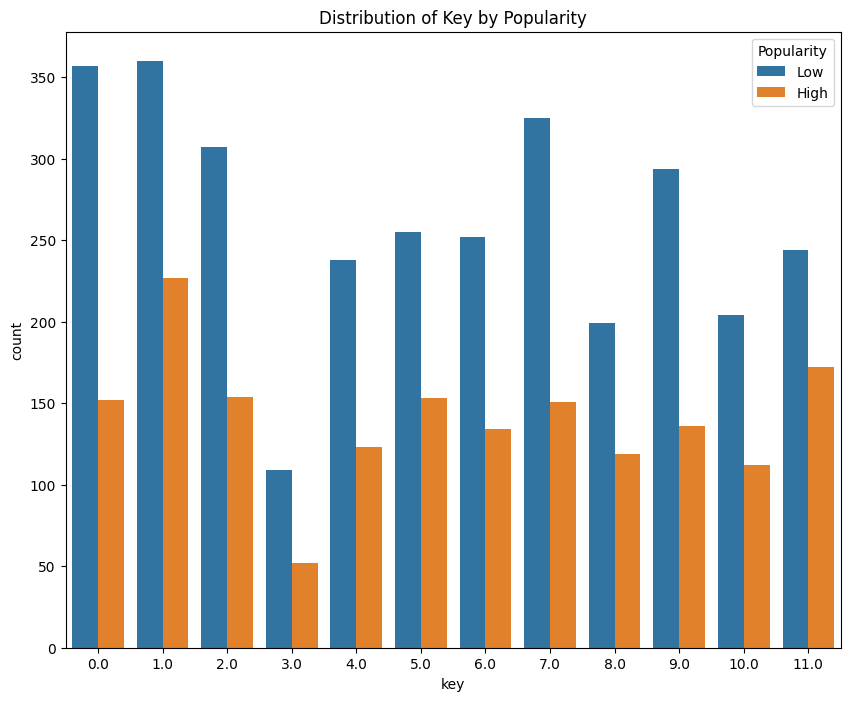

In [ ]:
#Mode Distribution
plt.figure(figsize=(10,8))
sns.countplot(data=df, x= 'mode', hue= 'Popularity')
plt.title('Distribution of Mode by Popularity')
plt.show()

#Key Distribution
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='key',hue='Popularity')
plt.title('Distribution of Key by Popularity')
plt.show()

#Feature Engineering

##Handling Skewed Features


In [ ]:
#Check skewness

skewed_features= df_encoded[numerical_features].skew().sort_values()
skewed_features

time_signature     -3.128418
loudness           -2.682891
Released_Year      -2.282122
danceability       -0.835852
energy             -0.688888
Released_Month     -0.201043
valence            -0.002808
Released_Day        0.058877
tempo               0.356420
acousticness        0.703483
instrumentalness    1.349644
speechiness         2.057018
liveness            2.356692
duration_ms         3.985025
dtype: float64

###Log Transformation of Highly Skewed Features

In [ ]:
#Identify features with High Skewed Features
high_skewness= skewed_features[abs(skewed_features)>0.5] .index.tolist() #Mengambil nama kolom dari nilai absolut skewed_features yang diatas 0.5 kemudian dibuat ke list

#Apply Log Transformation to positively skewed features
for feature in high_skewness:
  if (df_encoded[feature]>0).all():
    df_encoded[feature]=np.log1p(df_encoded[feature])


##Update Feature Lists

In [ ]:
#Recalculate numerical features if any transformation changed data types
numerical_features=df_encoded.select_dtypes(include=[np.number]).columns.tolist()

##Final Feature Set for Modeling

###Defining Features and Targets

In [ ]:
#Target Variable
y_classification= df_encoded['Popularity'] #Binary Classification Target
y_regression = df_encoded['track_popularity']#Regression Target


features=df_encoded.columns.drop(non_feature, errors = 'ignore') #Ini hanya nama kolomnya saja
print(f'Feature Matrix shape: {df_encoded[features].shape}')
print(f'Classification Target Shape: {y_classification.shape}')
print(f'Regression Target Shape: {y_regression.shape}')

#Distribution data of target variable
print("\nDistribution of Popular classes:")
print(y_classification.value_counts(normalize=True))#normalize agar outputny dalam bntuk persen

Feature Matrix shape: (4829, 143)
Classification Target Shape: (4829,)
Regression Target Shape: (4829,)

Distribution of Popular classes:
Popularity
Low     0.651066
High    0.348934
Name: proportion, dtype: float64


#Model Preparation

In this section, we prepare the data for modeling by splitting it into training and testing sets. We then apply feature scaling to normalize the numerical features. Note that scaling parameters are learned from the training data only to avoid data leakage. Additionally, the dependent variable is encoded using Label Encoder for models that require numerical target values.

##Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_classification=le.fit_transform(y_classification)


##Splitting the dataset into Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X=df_encoded[features]


X_train,X_test,y_train,y_test=train_test_split(X,y_classification,test_size=0.2)

In [ ]:
X

time_signature  speechiness  danceability  duration_ms    energy  \
0           1.609438     0.038547      0.492254    11.835400  0.557327   
1           1.609438     0.031208      0.452349    12.395043  0.607044   
2           1.609438     0.044400      0.464363    12.705071  0.590006   
3           1.609438     0.096219      0.366724    12.128981  0.098940   
4           1.609438     0.029365      0.521766    12.234276  0.386622   
...              ...          ...           ...          ...       ...   
4826        1.791759     0.065600      0.452985    12.126986  0.352064   
4827        1.609438     0.089932      0.537078    12.117558  0.545227   
4828        1.609438     0.088835      0.544647    12.175825  0.592774   
4829        1.609438     0.292670      0.380489    12.154221  0.495915   
4830        1.609438     0.120446      0.497740    12.231194  0.636577   

      instrumentalness  valence    tempo  loudness  acousticness  ...  \
0             0.290000    0.432  132.310    -3.785      0.062787  ...   
1             0.000377    0.795  129.981    -6.219      0.157858  ...   
2             0.000006    0.658  111.457    -7.299      0.282921  ...   
3             0.000000    0.394   76.474   -17.042      0.648673  ...   
4             0.284000    0.475   80.487    -9.691      0.579418  ...   
...                ...      ...      ...       ...           ...  ...   
4826          0.000013    0.693  124.357    -7.621      0.438900  ...   
4827          0.129000    0.530  105.016    -8.315      0.353470  ...   
4828          0.000000    0.606   99.005    -5.022      0.167208  ...   
4829          0.000000    0.339   83.389    -4.474      0.273076  ...   
4830          0.000009    0.421  126.881    -4.985      0.230318  ...   

      key_2.0  key_3.0  key_4.0  key_5.0  key_6.0  key_7.0  key_8.0  key_9.0  \
0       False    False    False    False    False    False    False    False   
1       False    False    False    False    False    False    False    False   
2       False    False    False    False    False    False    False    False   
3       False    False    False    False    False    False    False    False   
4       False    False    False    False    False    False    False     True   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4826    False    False    False    False    False    False    False    False   
4827    False     True    False    False    False    False    False    False   
4828    False    False    False    False     True    False    False    False   
4829    False    False    False    False    False    False    False    False   
4830    False    False    False    False     True    False    False    False   

      key_10.0  key_11.0  
0        False     False  
1        False     False  
2        False     False  
3        False     False  
4        False     False  
...        ...       ...  
4826      True     False  
4827     False     False  
4828     False     False  
4829     False     False  
4830     False     False  

[4829 rows x 143 columns]

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

#Modeling

## Support-Vector Machine


###Model Building

####GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': ['scale','auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
model=SVC()
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.86 %
Best Parameters: {'C': 0.75, 'gamma': 0.01, 'kernel': 'rbf'}


####Training the SVM Model on the Training Sets



In [ ]:
from sklearn.svm import SVC
svm=SVC(C=0.75, kernel='linear')
svm.fit(X_train_scaled,y_train)

SVC(C=0.75, kernel='linear')

####Predicting the Test Results

In [ ]:
prediction=svm.predict(X_test_scaled)

###Evaluation Model

####Confusion Matrix and Accuracy Score

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,prediction))
accuracy_score(y_test,prediction)

[[264  48]
 [ 61 593]]


0.8871635610766045

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       312
           1       0.93      0.91      0.92       654

    accuracy                           0.89       966
   macro avg       0.87      0.88      0.87       966
weighted avg       0.89      0.89      0.89       966



####Train and Test Accuracy

In [ ]:
train_acc=svm.score(X_train_scaled,y_train)
test_acc=svm.score(X_test_scaled,y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.8778
Test Accuracy: 0.8872


## K-NN

###Model Building

####GridSearchCV

In [ ]:
# Definisi model KNN
knn = KNeighborsClassifier()

# Grid parameter yang ingin dicoba
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Bobot jarak
    'metric': ['euclidean', 'manhattan',]  # Metode jarak
}

# GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Accuracy: 0.8713420560497088


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.85373821 0.85192575 0.86435394 0.85943501 0.86409387 0.86124815
 0.87082225 0.86564626 0.87056552 0.86642413        nan 0.85503422
        nan 0.86331566        nan 0.86564626        nan 0.87082526
        nan 0.87134206 0.85373821 0.85192575 0.86435394 0.85943501
 0.86409387 0.86124815 0.87082225 0.86564626 0.87056552 0.86642413]
  warnings.warn(


####Training the K-NN Model on the Training Sets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11, weights= 'distance')
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

####Predicting the Test Results

In [ ]:
prediction=knn.predict(X_test_scaled)

###Evaluation Model

####Confusion Matrix and Accuracy Score

In [ ]:
print(confusion_matrix(y_test,prediction))
accuracy_score(y_test,prediction)

[[261  51]
 [ 62 592]]


0.8830227743271222

####Classification Report

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       312
           1       0.92      0.91      0.91       654

    accuracy                           0.88       966
   macro avg       0.86      0.87      0.87       966
weighted avg       0.88      0.88      0.88       966



####Train and Test Accuracy

In [ ]:
train_acc=knn.score(X_train_scaled,y_train)
test_acc=knn.score(X_test_scaled,y_test)

print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy : 0.9928
Test Accuracy: 0.8830


## Random Forest Classification

###Model Building

####GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid={
    'n_estimators': [10,50,100,200,300],
    'max_depth': [10,20,None],
    'criterion': ['gini','entropy'],
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],    # Minimum sampel dalam satu daun
}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,
                         cv=5, n_jobs=1, scoring='accuracy')
grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print("Best Accuracy: {:.2f}%".format(best_accuracy*100))
print("Best Parameters:",best_parameters)


Best Accuracy: 87.24%
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### Training the Random Forest Classification Model on the Training Sets

In [ ]:
randomforestclassifier=RandomForestClassifier(n_estimators= 200,
                                              criterion= 'entropy',
                                              random_state= 42,
                                              min_samples_split = 2,
                                              min_samples_leaf=1,
                                              max_depth=None,
)
randomforestclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

####Predicting the Test Results

In [ ]:
prediction=randomforestclassifier.predict(X_test)

###Evaluation Model


####Confusion Matrix and Accuracy Score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[250  62]
 [ 55 599]]
0.8788819875776398


####Classification Report

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       312
           1       0.91      0.92      0.91       654

    accuracy                           0.88       966
   macro avg       0.86      0.86      0.86       966
weighted avg       0.88      0.88      0.88       966



####Train and Test Accuracy

In [ ]:
train_acc=randomforestclassifier.score(X_train,y_train)
test_acc=randomforestclassifier.score(X_test,y_test)
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy : 0.9928
Test Accuracy: 0.8789
